# Unsupervised learning (nenadgledano učenje)

In [142]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [143]:
df = pd.read_csv("digital_literacy_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   int64  
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 8   Internet_Usage_Score                          1000 non-null   int64  
 9   Mobile_Literacy_Score                         1000 non-null   in

In [144]:
df.drop_duplicates(keep='first',inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       788 non-null    object 
 1   Age                                           788 non-null    int64  
 2   Gender                                        788 non-null    object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             788 non-null    object 
 5   Household_Income                              788 non-null    object 
 6   Location_Type                                 788 non-null    object 
 7   Basic_Computer_Knowledge_Score                788 non-null    int64  
 8   Internet_Usage_Score                          788 non-null    int64  
 9   Mobile_Literacy_Score                         788 non-null    int64  


In [145]:
df.drop(columns=['User_ID','Overall_Literacy_Score'], inplace=True)

## Opis karakteristika

| Karakteristika | Opis
| -------- | ------- |
| Age | Godina starosti osobe |
| Gender | Pol osobe |
| Education_Level | Nivo obrazovanja |
| Employment_status | Status zaposlenja |
| Household_Income  | Prihodi domacinstva |
| Location_Type  | Tip lokacije   |
| Basic_Computer_Knowledge_Score |  Osnovno znanje rada na racunaru |
| Internet_Usage_Score |  Rezultati koriscenja interneta   |
| Mobile_Literacy_Score | Rezultati koriscenja mobilnog  |
| Post_Training_Basic_Computer_Knowledge_Score | Znanje na racunaru posle obuke   |
| Post_Training_Internet_Usage_Score  | Znanje koriscenja interneta nakon obuke  |
| Post_Training_Mobile_Literacy_Score |  Znanje koriscenja mobilnog nakon obuke  |
| Modules_Completed  |  Zavrseni moduli   |
| Average_Time_Per_Module   | Prosecno vreme po modulu |
| Quiz_Performance  | Rezultati kviza   |
| Session_Count | Broj sesija |
| Engagement_Level  |   Nivo angazovanja  |
| Adaptability_Score | Rezultati prilagodljivosti   |
| Feedback_Rating   | Nivo povratne informacije|
| Skill_Application |  Primena vestina   |
| Employment_Impact |  Uticaj zaposljenja  |

In [146]:
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
for col in categorical_features:
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female' 'Other']
Education_Level: ['Primary' 'High School' 'Secondary']
Employment_Status: ['Student' 'Farmer' 'Other' 'Self-Employed' 'Unemployed']
Household_Income: ['Medium' 'Low' 'High']
Location_Type: ['Semi-Rural' 'Rural']
Engagement_Level: ['Low' 'Medium' 'High']
Employment_Impact: ['Yes' 'No']


In [147]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ["Education_Level", "Engagement_Level", "Household_Income"]
ordinal_categories = [
    ["Primary", "Secondary", "High School"],  # Education_Level
    ["Low", "Medium", "High"],                # Engagement_Level
    ["Low", "Medium", "High"]                 # Household_Income
]
nominal_cols = ["Employment_Status"]
label_cols   = ["Gender", "Location_Type", "Employment_Impact"]

df_encoded = df.copy()

oe = OrdinalEncoder(
    categories=ordinal_categories,
    dtype="int32",
    handle_unknown="use_encoded_value",
    unknown_value=-1
)
df_encoded[ordinal_cols] = oe.fit_transform(df_encoded[ordinal_cols]).astype("int32")

df_encoded[label_cols] = df_encoded[label_cols].apply(lambda col: pd.factorize(col, sort=True)[0]).astype("int32")

df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, dtype="uint8")
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 998
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           788 non-null    int64  
 1   Gender                                        788 non-null    int32  
 2   Education_Level                               788 non-null    int32  
 3   Household_Income                              788 non-null    int32  
 4   Location_Type                                 788 non-null    int32  
 5   Basic_Computer_Knowledge_Score                788 non-null    int64  
 6   Internet_Usage_Score                          788 non-null    int64  
 7   Mobile_Literacy_Score                         788 non-null    int64  
 8   Post_Training_Basic_Computer_Knowledge_Score  788 non-null    int64  
 9   Post_Training_Internet_Usage_Score            788 non-null    int64  


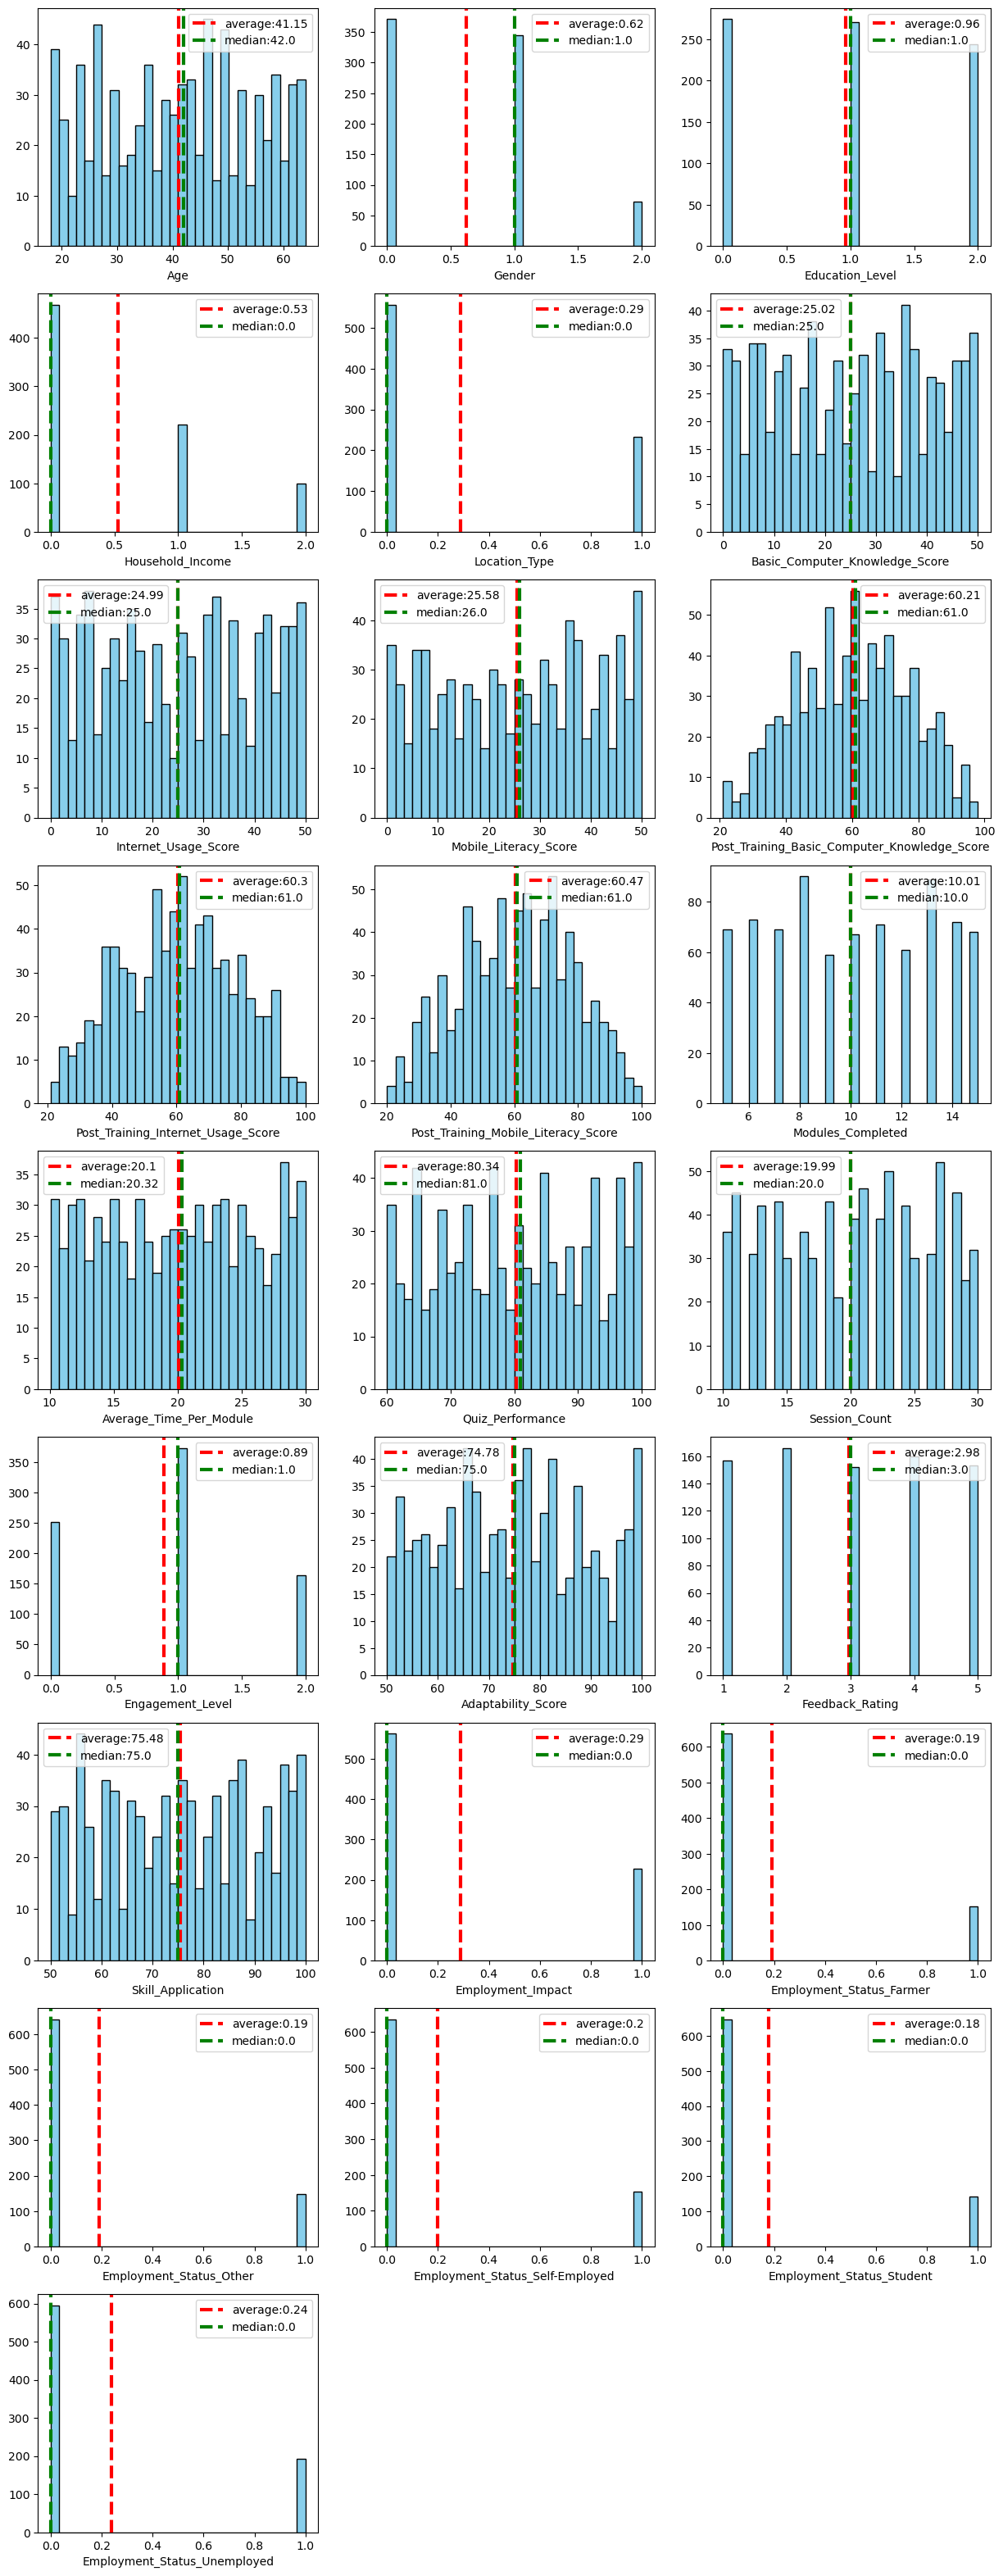

In [148]:
plt.figure(figsize=(15,40))
for ind,col in enumerate(df_encoded.columns):
    plt.subplot(9,3,ind+1)
    plt.hist(df_encoded[col], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.axvline(np.round(df_encoded[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df_encoded[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.legend([f'average:{np.round(df_encoded[col].mean(),2)}',f'median:{np.round(df_encoded[col].median(),2)}'])
plt.show()

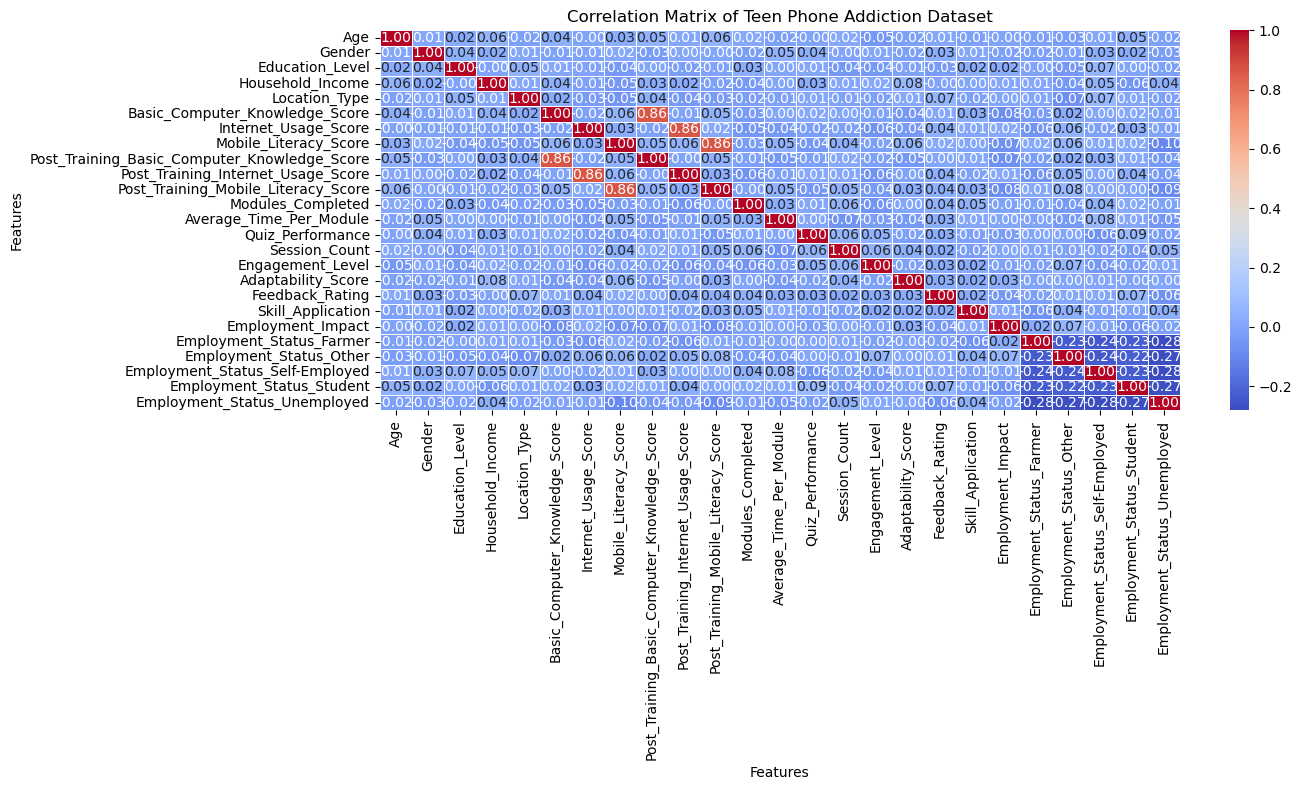

In [149]:
correlation_matrix = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(14, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

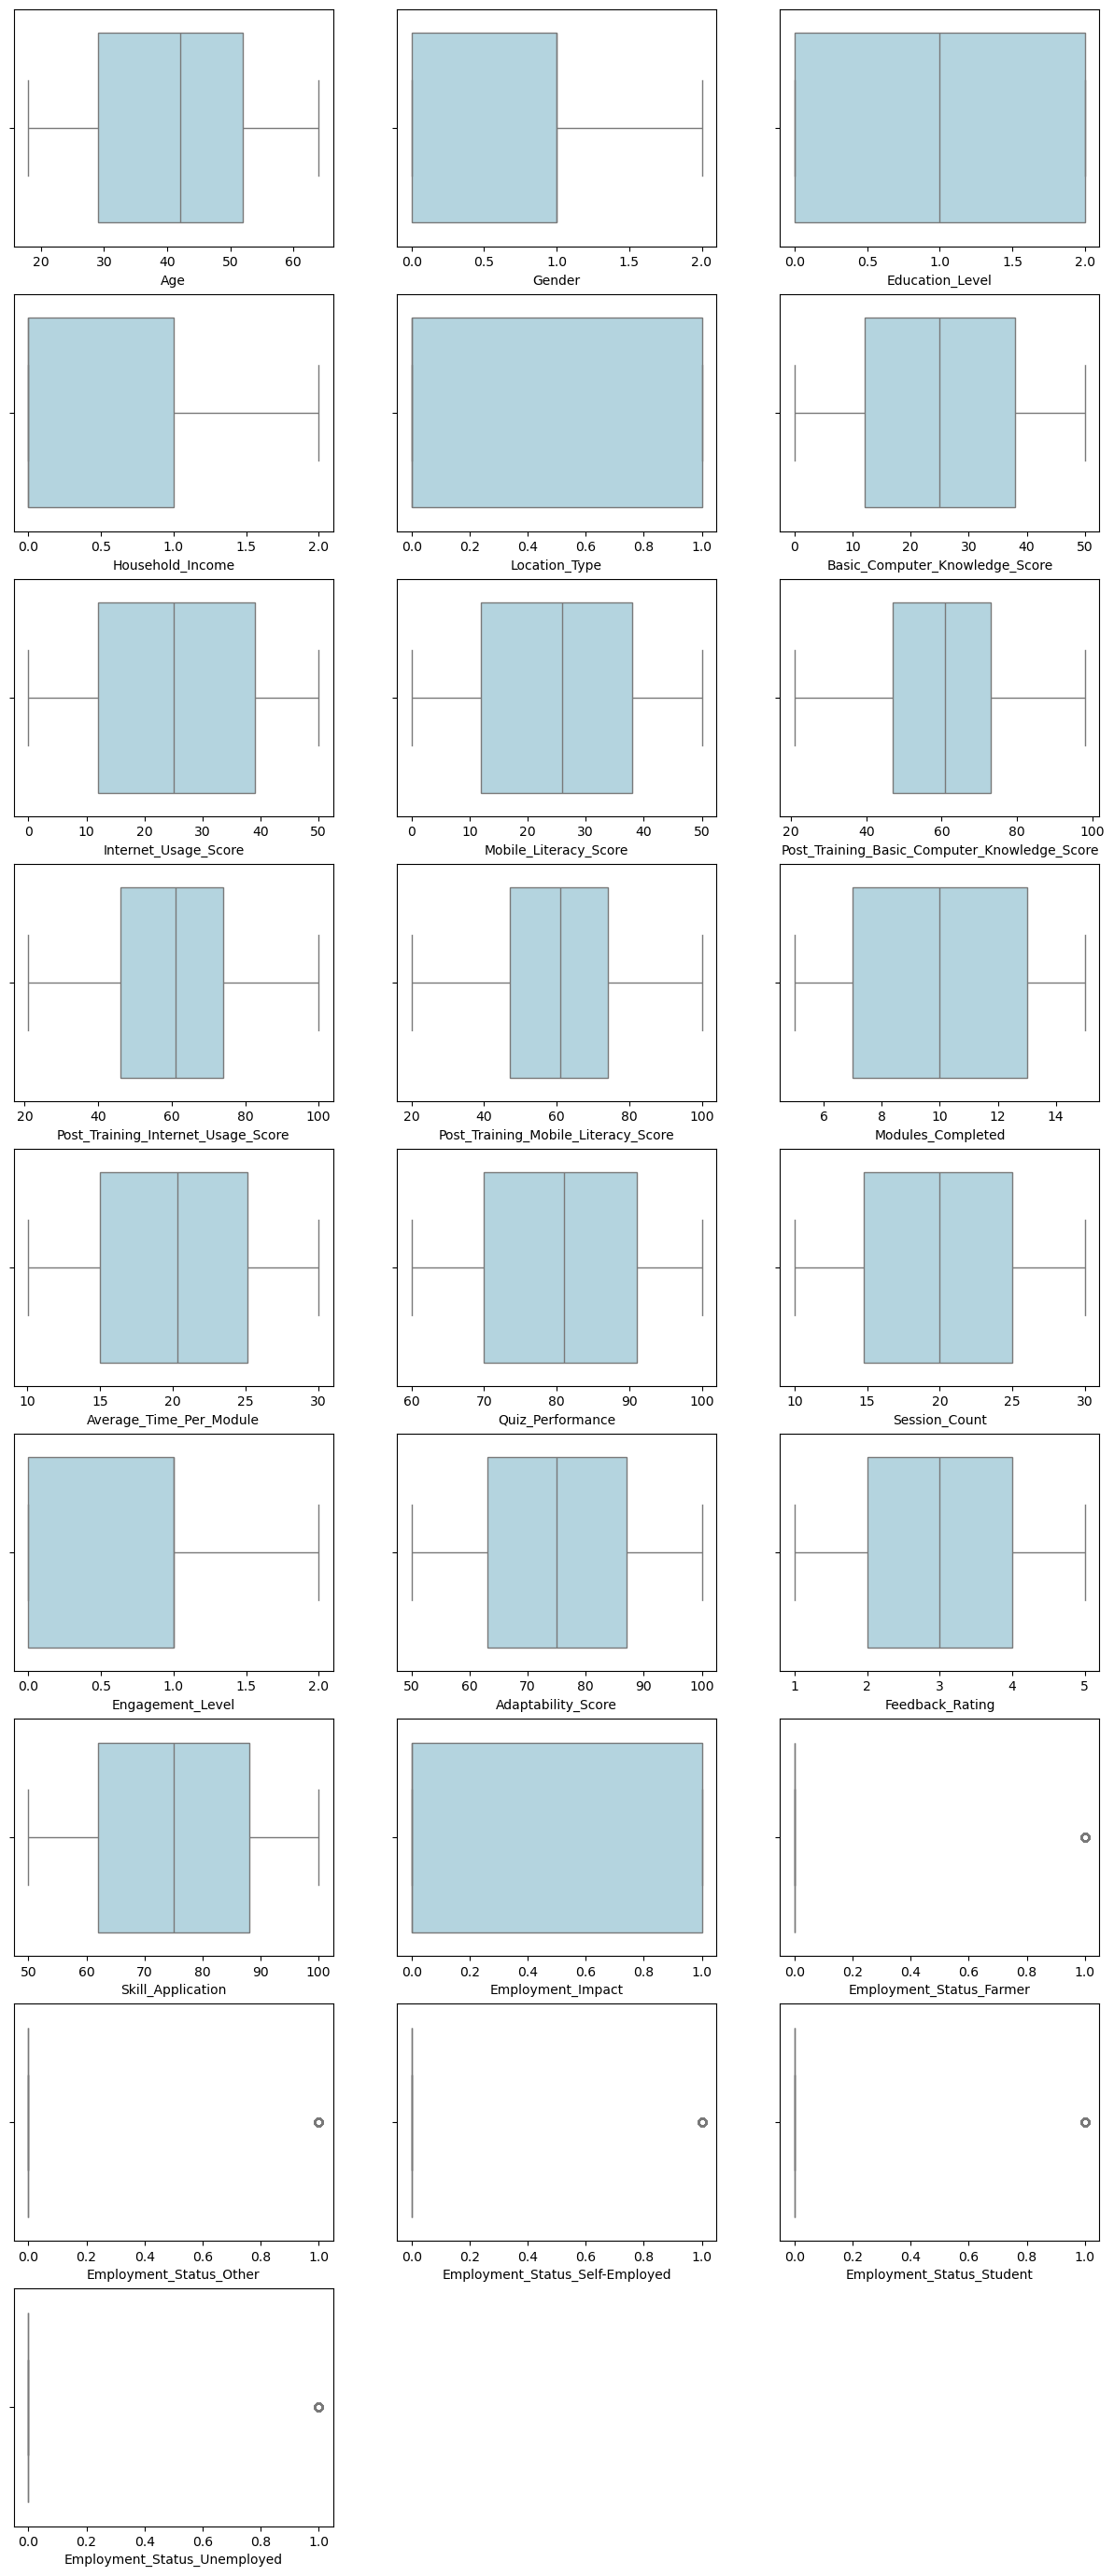

In [150]:
fig = plt.figure(figsize=(15,35))
for i, col in enumerate(df_encoded.columns):
  plt.subplot(9,3,i+1)
  seaborn.boxplot(x = df_encoded[col], color='lightblue')
  plt.xlabel(col)

## MinMax, Standard Scaler or Robust Scaler

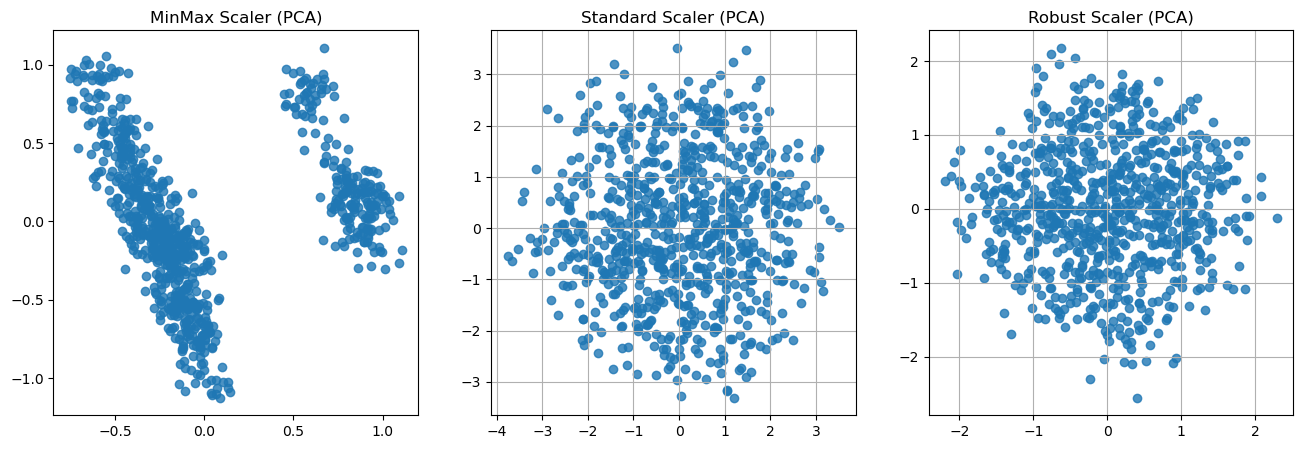

In [151]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()
rbs_scaler = RobustScaler()

df_minmax= minmax_scaler.fit_transform(df_encoded)
df_minmax = pd.DataFrame(df_minmax, columns=df_encoded.columns)

pca_minmax = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result_minmax = pca_minmax.fit_transform(df_minmax)

df_std= std_scaler.fit_transform(df_encoded)
df_std = pd.DataFrame(df_std, columns=df_encoded.columns)

pca_std = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result_std = pca_std.fit_transform(df_std)

df_rbs= rbs_scaler.fit_transform(df_encoded)
df_rbs = pd.DataFrame(df_rbs, columns=df_encoded.columns)

pca_rbs = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result_rbs = pca_rbs.fit_transform(df_rbs)

plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
plt.scatter(pca_result_minmax[:, 0], pca_result_minmax[:, 1], alpha=0.8)
plt.title(f"MinMax Scaler (PCA)")
#plt.grid()

plt.subplot(1, 3,2)
plt.scatter(pca_result_std[:, 0], pca_result_std[:, 1], alpha=0.8)
plt.title(f"Standard Scaler (PCA)")
plt.grid()
#plt.show()

plt.subplot(1, 3,3)
plt.scatter(pca_result_rbs[:, 0], pca_result_rbs[:, 1], alpha=0.8)
plt.title(f"Robust Scaler (PCA)")
plt.grid()
plt.show()

df_scaled=df_minmax

In [152]:
def importance_pca(pca:PCA,title:str="PCA Feature Importance"):
    loadings = pca.components_.T  # shape: [n_features, n_components]
    importance = pd.DataFrame(
        loadings,
        index=df_encoded.columns,
        columns=[f'PC{i+1}' for i in range(loadings.shape[1])]
    )
    importance=importance.abs()
    importance=importance.max(axis=1,)
    importance=importance.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    importance.sort_values(ascending=True).plot(kind="barh")
    plt.title(title)
    plt.xlabel("Max |Feature| across PCs")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    print(importance.head(4))

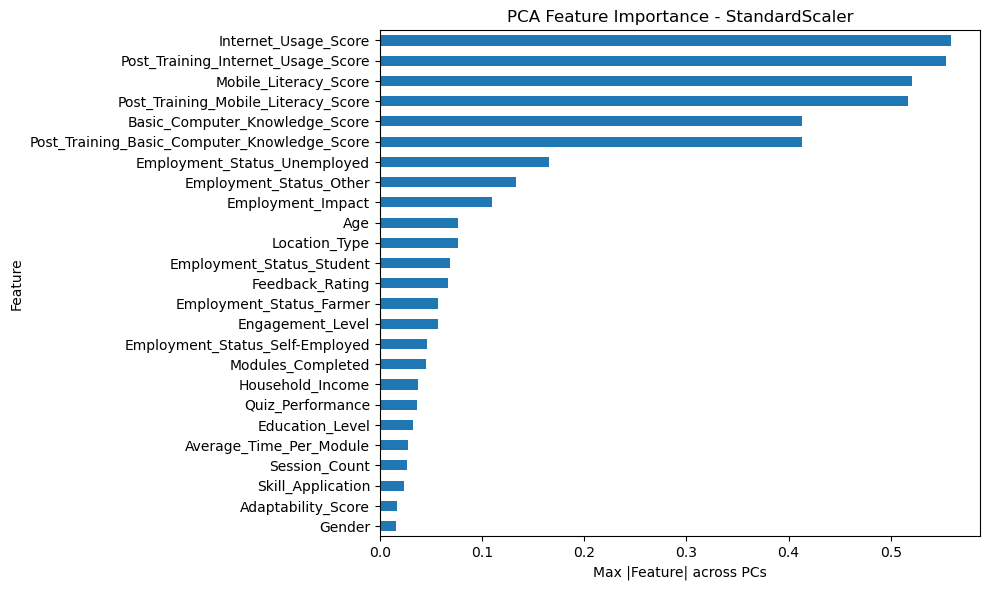

Internet_Usage_Score                   0.559333
Post_Training_Internet_Usage_Score     0.553624
Mobile_Literacy_Score                  0.521213
Post_Training_Mobile_Literacy_Score    0.517199
dtype: float64


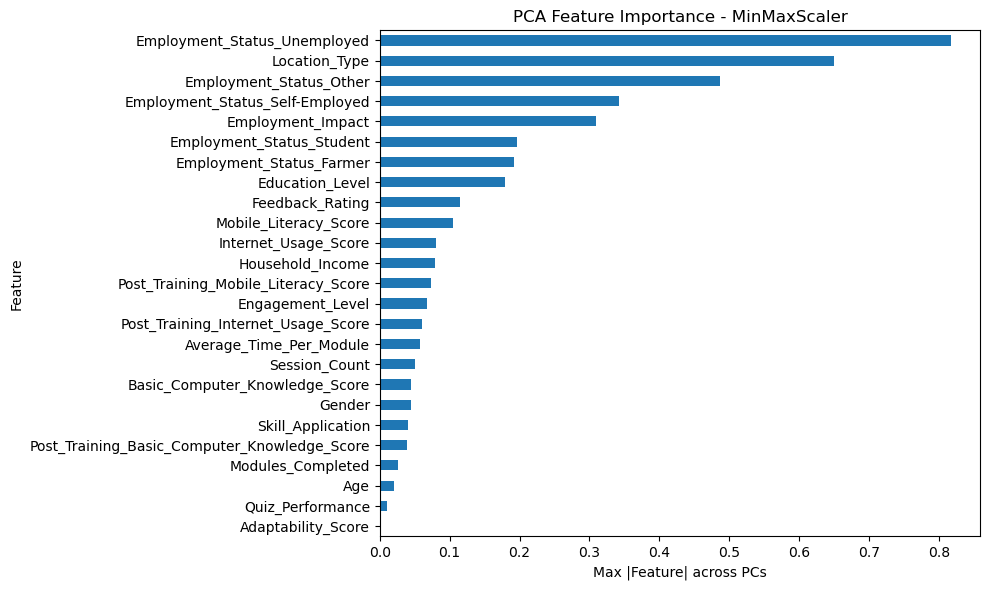

Employment_Status_Unemployed       0.817815
Location_Type                      0.649794
Employment_Status_Other            0.486448
Employment_Status_Self-Employed    0.342381
dtype: float64


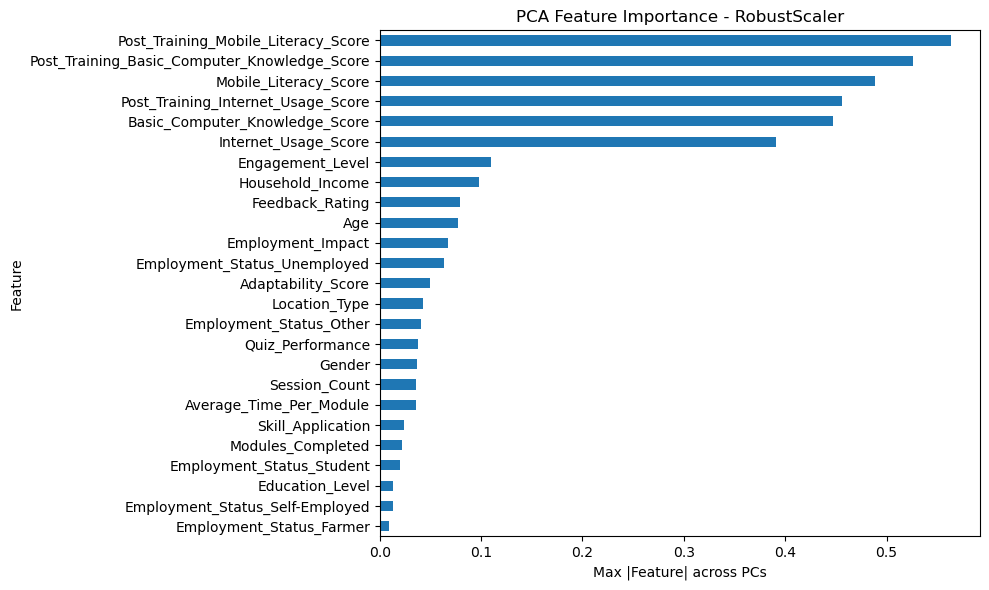

Post_Training_Mobile_Literacy_Score             0.563991
Post_Training_Basic_Computer_Knowledge_Score    0.526315
Mobile_Literacy_Score                           0.488504
Post_Training_Internet_Usage_Score              0.455814
dtype: float64


In [153]:
importance_pca(pca_std,title="PCA Feature Importance - StandardScaler")
importance_pca(pca_minmax,title="PCA Feature Importance - MinMaxScaler")
importance_pca(pca_rbs,title="PCA Feature Importance - RobustScaler")

## Kmeans

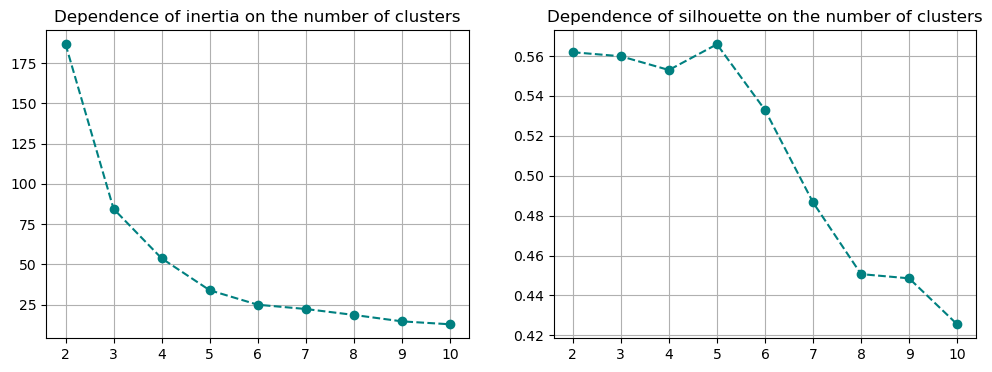

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cols = ['Cluster',"Cluster_Name"]
data = df_scaled.drop(['Cluster', 'Cluster_Name'], axis=1) if all(col in df_scaled.columns for col in cols) else df_scaled.copy()

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result = pca.fit_transform(data)

inertia = []
siluette = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)
    if len(set(kmeans.labels_)) > 1:
        siluette.append(silhouette_score(pca_result, kmeans.labels_))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of inertia on the Number of clusters")
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of silhouette on the Number of clusters")
plt.xticks(k_values)
plt.grid()

plt.show()


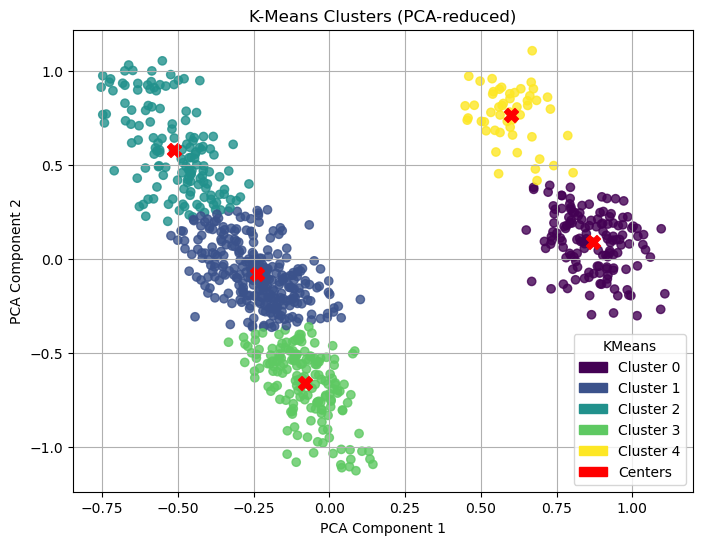

In [155]:
import matplotlib.patches as mpatches

kmeans = KMeans(n_clusters=5, random_state=18)
df_scaled['Cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1],
    c=df_scaled['Cluster'], cmap='viridis', alpha=0.8
)

centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1],
    c='red', s=100, marker='X'
)

unique_clusters = np.unique(df_scaled['Cluster'])
colors = [scatter.cmap(scatter.norm(c)) for c in unique_clusters]

cluster_handles = [
    mpatches.Patch(color=colors[i], label=f"Cluster {cluster}")
    for i, cluster in enumerate(unique_clusters)
]
center_handle = mpatches.Patch(color='red', label='Centers')

plt.legend(handles=cluster_handles + [center_handle], title="KMeans", loc="lower right")

plt.title('K-Means Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


In [156]:
centers_pca=kmeans.cluster_centers_
centers_scaled = pca.inverse_transform(centers_pca)
centers_original = minmax_scaler.inverse_transform(centers_scaled)
cluster_profiles = pd.DataFrame(
    centers_original,
    columns=df_encoded.columns  # original features
)
cluster_profiles.round(2)

Age  Gender  ...  Employment_Status_Student  Employment_Status_Unemployed
0  40.36    0.55  ...                       0.01                          0.98
1  41.35    0.64  ...                       0.23                          0.03
2  41.88    0.70  ...                       0.29                         -0.01
3  40.96    0.59  ...                       0.18                         -0.01
4  40.90    0.61  ...                       0.08                          0.96

[5 rows x 25 columns]

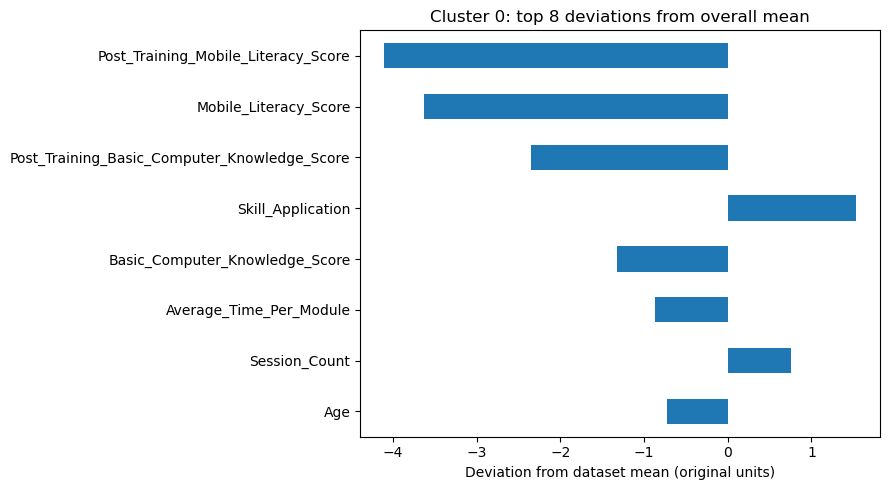

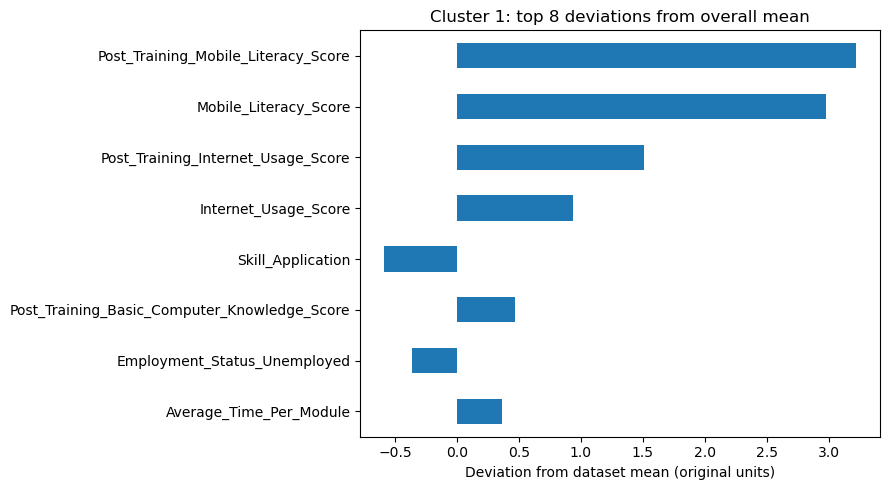

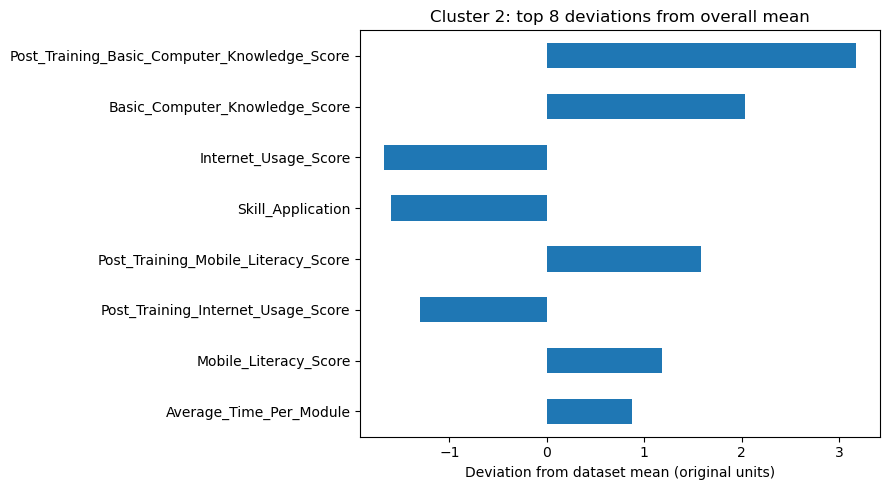

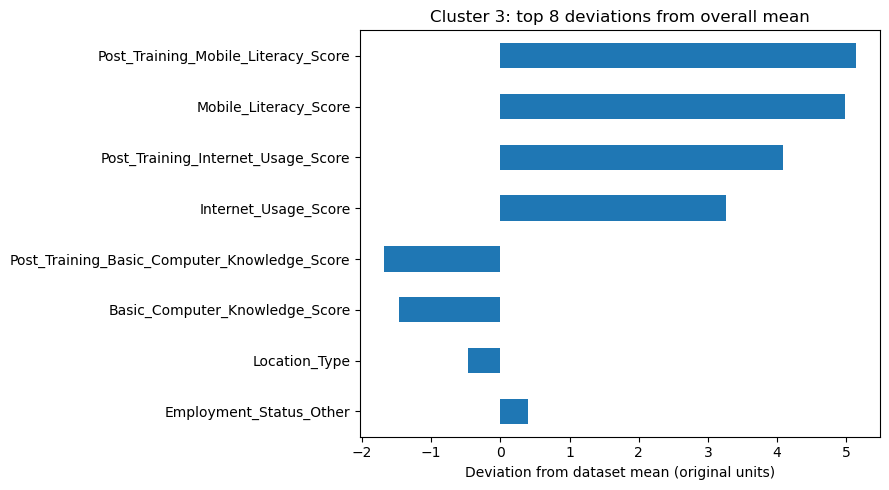

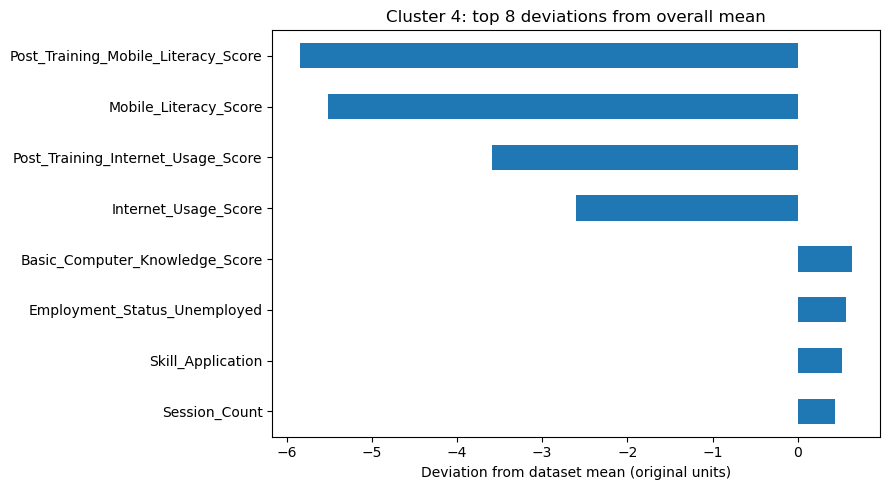

In [157]:
k = 8  # how many top features to show
overall_mean = cluster_profiles.mean(axis=0)
deviation = cluster_profiles - overall_mean   # same units as original features

for i in range(deviation.shape[0]):
    dev_sorted = deviation.iloc[i].sort_values(key=np.abs, ascending=False).head(k)
    plt.figure(figsize=(9, 5))
    dev_sorted.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title(f'Cluster {i}: top {k} deviations from overall mean')
    plt.xlabel('Deviation from dataset mean (original units)')
    plt.tight_layout()
    plt.show()


In [158]:
'''def radar_cluster(cp, features, cluster_id):
    import numpy as np
    import matplotlib.pyplot as plt

    subset = cp[features]
    z = (subset - subset.mean(axis=0)) / (subset.std(axis=0) + 1e-9)
    vals = z.loc[cluster_id].values
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
    vals = np.concatenate([vals, vals[:1]])
    angles = np.concatenate([angles, angles[:1]])

    fig = plt.figure(figsize=(7,7))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, vals)
    ax.fill(angles, vals, alpha=0.2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=9)
    ax.set_yticklabels([])
    ax.set_title(f'Cluster {cluster_id} (z-score)')
    plt.tight_layout(); plt.show()

# example usage:
key_features = cluster_profiles.var().sort_values(ascending=False).head(8).index.tolist()
radar_cluster(cluster_profiles, key_features, cluster_id=0)
radar_cluster(cluster_profiles, key_features, cluster_id=1)
radar_cluster(cluster_profiles, key_features, cluster_id=2)
radar_cluster(cluster_profiles, key_features, cluster_id=3)
radar_cluster(cluster_profiles, key_features, cluster_id=4)'''


"def radar_cluster(cp, features, cluster_id):\n    import numpy as np\n    import matplotlib.pyplot as plt\n\n    subset = cp[features]\n    z = (subset - subset.mean(axis=0)) / (subset.std(axis=0) + 1e-9)\n    vals = z.loc[cluster_id].values\n    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)\n    vals = np.concatenate([vals, vals[:1]])\n    angles = np.concatenate([angles, angles[:1]])\n\n    fig = plt.figure(figsize=(7,7))\n    ax = plt.subplot(111, polar=True)\n    ax.plot(angles, vals)\n    ax.fill(angles, vals, alpha=0.2)\n    ax.set_xticks(angles[:-1])\n    ax.set_xticklabels(features, fontsize=9)\n    ax.set_yticklabels([])\n    ax.set_title(f'Cluster {cluster_id} (z-score)')\n    plt.tight_layout(); plt.show()\n\n# example usage:\nkey_features = cluster_profiles.var().sort_values(ascending=False).head(8).index.tolist()\nradar_cluster(cluster_profiles, key_features, cluster_id=0)\nradar_cluster(cluster_profiles, key_features, cluster_id=1)\nradar_cluster(cluste

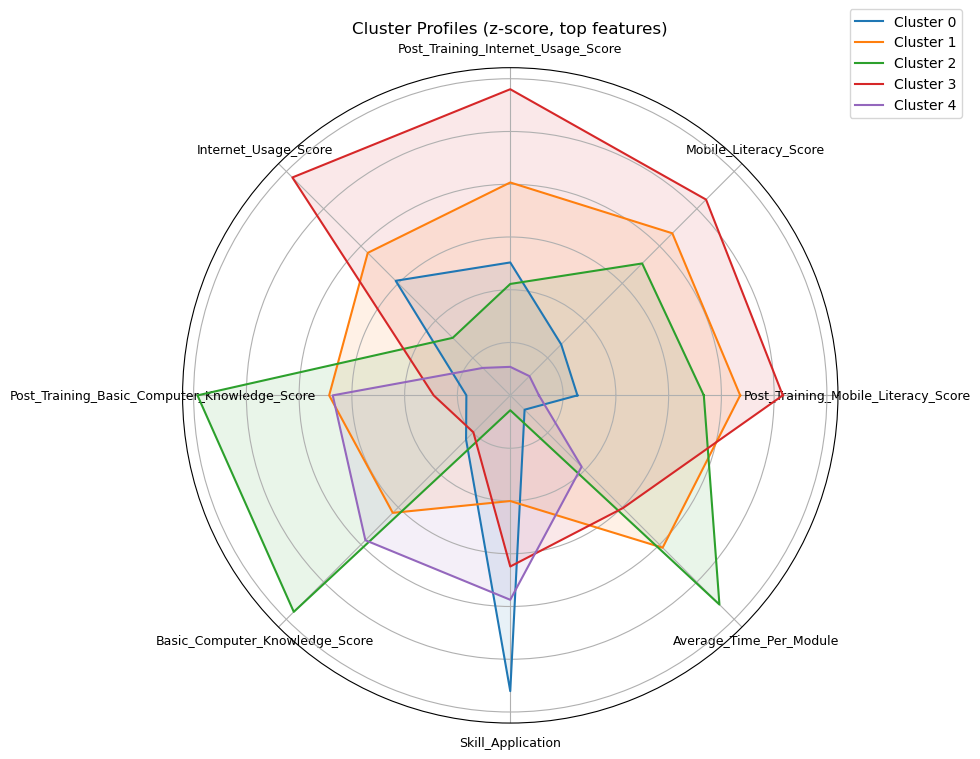

In [159]:
def radar_all_clusters(cp, features,fig):
    import numpy as np
    import matplotlib.pyplot as plt

    subset = cp[features]
    # z-score normalization per feature (so scales are comparable)
    z = (subset - subset.mean(axis=0)) / (subset.std(axis=0) + 1e-9)

    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
    angles = np.concatenate([angles, angles[:1]])  # close circle

    fig = plt.figure(figsize=fig)
    ax = plt.subplot(111, polar=True)

    # Plot each cluster
    for cluster_id in z.index:
        vals = z.loc[cluster_id].values
        vals = np.concatenate([vals, vals[:1]])  # close circle
        ax.plot(angles, vals, label=f"Cluster {cluster_id}")
        ax.fill(angles, vals, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=9)
    ax.set_yticklabels([])
    ax.set_title("Cluster Profiles (z-score, top features)")
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
    plt.tight_layout()
    plt.show()


# Example usage:
key_features = cluster_profiles.var().sort_values(ascending=False).head(8).index.tolist()
radar_all_clusters(cluster_profiles, key_features,fig=(10,10))


## DBSCAN

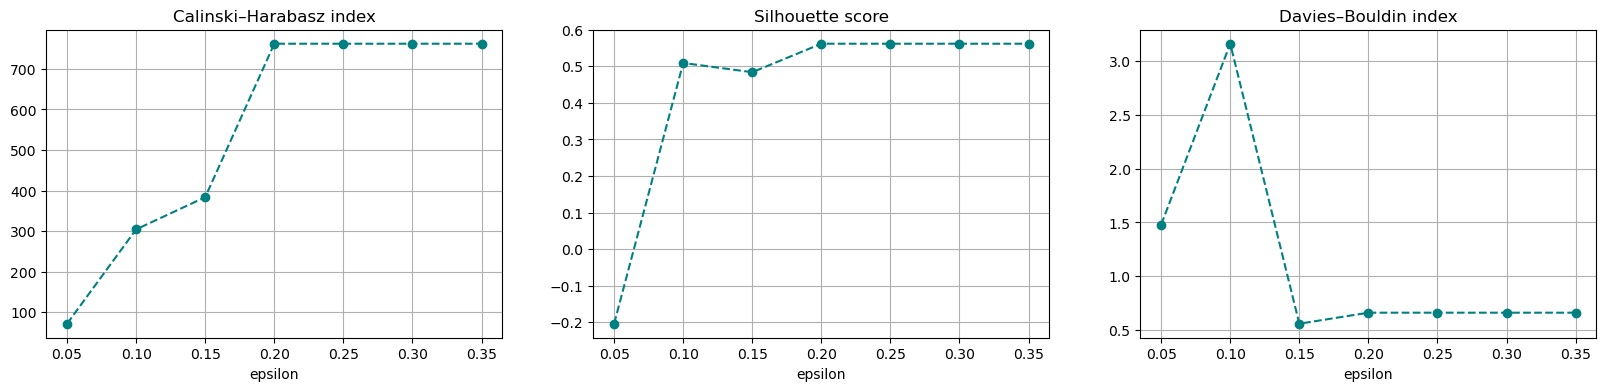

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

cols = ['Cluster']
data = df_scaled.drop(['Cluster'], axis=1) if all(col in df_scaled.columns for col in cols) else df_scaled.copy()

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result = pca.fit_transform(data)

calinski = []
siluette = []
davies = []

#dbscan = DBSCAN(eps=0.1, min_samples=5)
#dbscan_labels = dbscan.fit_predict(pca_result)

eps=np.arange(0.05,0.4,0.05).round(4)

for ep in eps:
    dbscan = DBSCAN(eps=ep, min_samples=5)
    dbscan_labels = dbscan.fit_predict(pca_result)
    calinski.append(calinski_harabasz_score(pca_result, dbscan_labels))
    siluette.append(silhouette_score(pca_result, dbscan_labels))
    davies.append(davies_bouldin_score(pca_result, dbscan_labels))


plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.plot(eps, calinski, 'o',linestyle='--', color='teal')
plt.title(f"Calinski–Harabasz index") #Higher = better
plt.xticks(eps)
plt.xlabel("epsilon")
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(eps, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Silhouette score") #Higher = better
plt.xticks(eps)
plt.xlabel("epsilon")
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(eps, davies, 'o',linestyle='--', color='teal')
plt.title(f"Davies–Bouldin index") #Lower = better
plt.xticks(eps)
plt.xlabel("epsilon")
plt.grid()

plt.show()

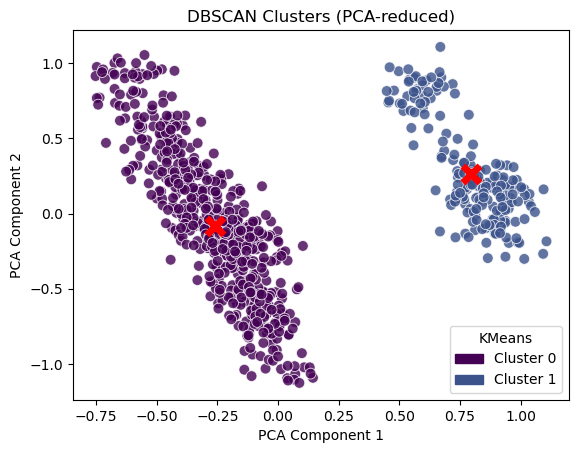

In [181]:
from sklearn.metrics import pairwise_distances_argmin_min

dbscan = DBSCAN(eps=0.2, min_samples=5)
df_scaled['Cluster']  = dbscan.fit_predict(pca_result)

unique_clusters = np.unique(df_scaled['Cluster'])
colors = [scatter.cmap(scatter.norm(c)) for c in unique_clusters]

cluster_handles = [
    mpatches.Patch(color=colors[i], label=f"Cluster {cluster}")
    for i, cluster in enumerate(unique_clusters)
]
seaborn.scatterplot(
        x=pca_result[:,0], y=pca_result[:, 1],
        hue=df_scaled['Cluster'] ,
        palette=colors,
        legend='full',
        alpha=0.8,
        s=60,
    )


medoids = []
for c in unique_clusters:
    cluster_points = pca_result[df_scaled['Cluster'] == c]
    # index of closest point to cluster mean
    mean = cluster_points.mean(axis=0)
    idx, _ = pairwise_distances_argmin_min([mean], cluster_points)
    medoids.append(cluster_points[idx[0]])

medoids = np.array(medoids)

plt.scatter(
    medoids[:, 0], medoids[:, 1],
    c="red", s=150, marker="x",linewidths=5, label="Medoids"
)
plt.legend()

plt.legend(handles=cluster_handles, title="KMeans", loc="lower right")
plt.title("DBSCAN Clusters (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [163]:
centers_dbscan=medoids
centers_scaled = pca.inverse_transform(centers_dbscan)
centers_original = minmax_scaler.inverse_transform(centers_scaled)
cluster_profiles = pd.DataFrame(
    centers_original,
    columns=df_encoded.columns  # original features
)
cluster_profiles.round(2)

Age  Gender  ...  Employment_Status_Student  Employment_Status_Unemployed
0  41.37    0.64  ...                       0.23                          0.01
1  40.50    0.56  ...                       0.03                          0.97

[2 rows x 25 columns]

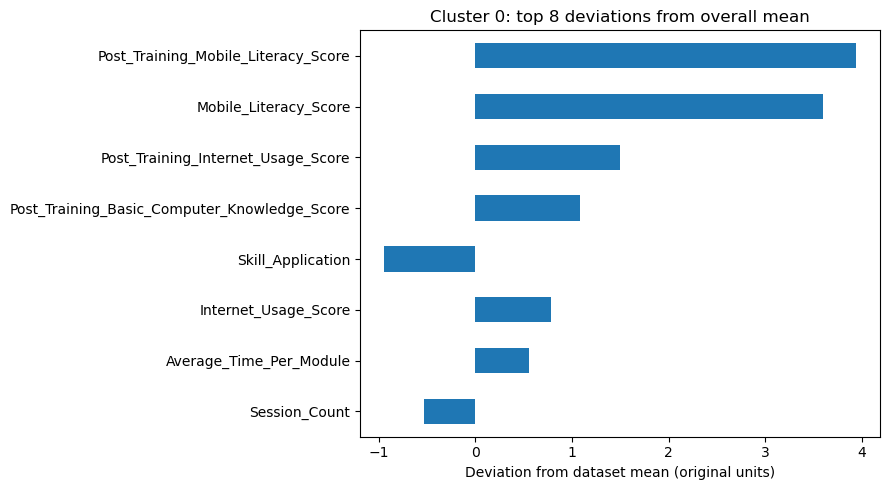

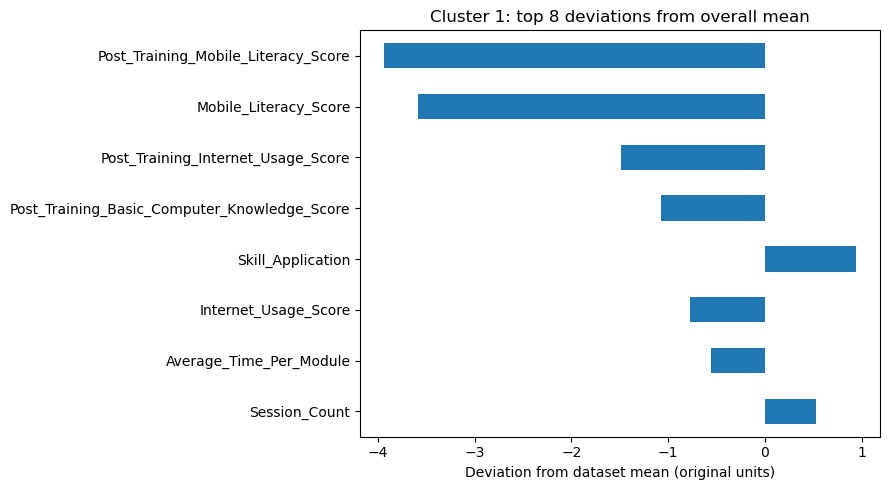

In [164]:
k = 8  # how many top features to show
overall_mean = cluster_profiles.mean(axis=0)
deviation = cluster_profiles - overall_mean   # same units as original features

for i in range(deviation.shape[0]):
    dev_sorted = deviation.iloc[i].sort_values(key=np.abs, ascending=False).head(k)
    plt.figure(figsize=(9, 5))
    dev_sorted.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title(f'Cluster {i}: top {k} deviations from overall mean')
    plt.xlabel('Deviation from dataset mean (original units)')
    plt.tight_layout()
    plt.show()

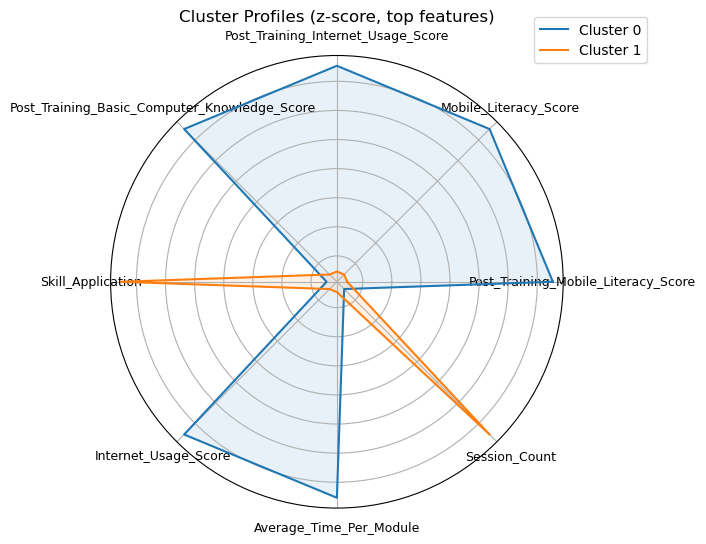

In [165]:
key_features = cluster_profiles.var().sort_values(ascending=False).head(8).index.tolist()
radar_all_clusters(cluster_profiles, key_features,fig=(7,7))

## Hierarchical Agglomerative clustering

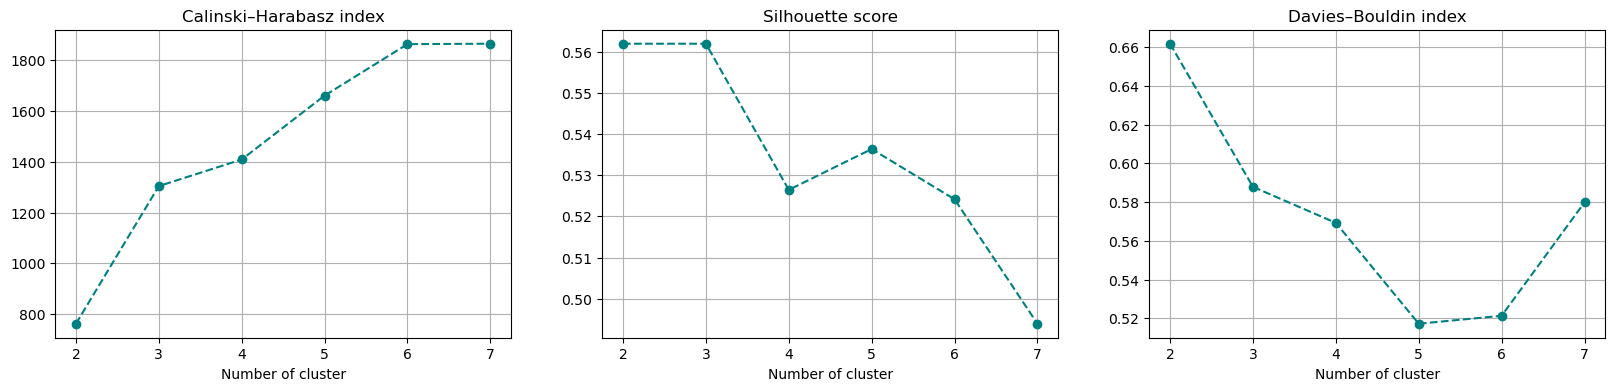

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

cols = ['Cluster']
data = df_scaled.drop(['Cluster'], axis=1) if all(col in df_scaled.columns for col in cols) else df_scaled.copy()

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result = pca.fit_transform(data)

calinski = []
siluette = []
davies = []

num_cluster=np.arange(2,8)

for num in num_cluster:
    aggclust = AgglomerativeClustering(n_clusters=num)
    aggclust_labels = aggclust.fit_predict(pca_result)
    calinski.append(calinski_harabasz_score(pca_result, aggclust_labels))
    siluette.append(silhouette_score(pca_result, aggclust_labels))
    davies.append(davies_bouldin_score(pca_result, aggclust_labels))

plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.plot(num_cluster, calinski, 'o',linestyle='--', color='teal')
plt.title(f"Calinski–Harabasz index") #Higher = better
plt.xticks(num_cluster)
plt.xlabel("Number of clusters")
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(num_cluster, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Silhouette score") #Higher = better
plt.xticks(num_cluster)
plt.xlabel("Number of clusters")
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(num_cluster, davies, 'o',linestyle='--', color='teal')
plt.title(f"Davies–Bouldin index") #Lower = better
plt.xticks(num_cluster)
plt.xlabel("Number of clusters")
plt.grid()

plt.show()

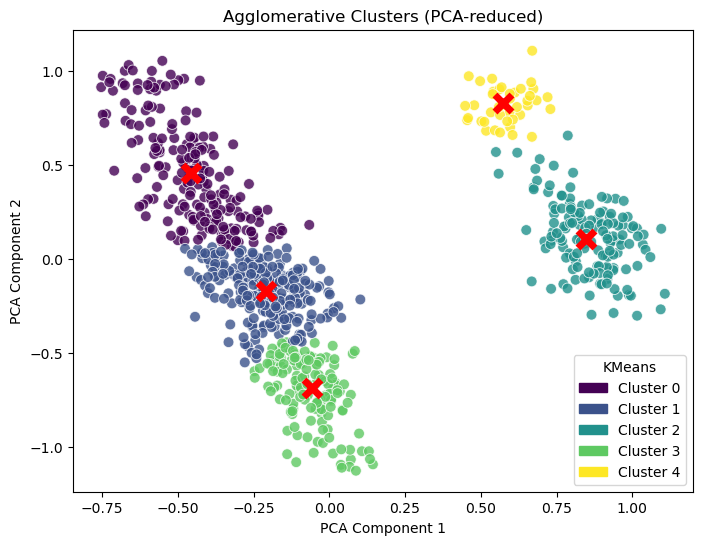

In [182]:
from sklearn.metrics import pairwise_distances_argmin_min

aggclust = AgglomerativeClustering(n_clusters=5)
df_scaled['Cluster']  = aggclust.fit_predict(pca_result)

unique_clusters = np.unique(df_scaled['Cluster'])
colors = [scatter.cmap(scatter.norm(c)) for c in unique_clusters]

cluster_handles = [
    mpatches.Patch(color=colors[i], label=f"Cluster {cluster}")
    for i, cluster in enumerate(unique_clusters)
]
plt.figure(figsize=(8,6))

seaborn.scatterplot(
        x=pca_result[:,0], y=pca_result[:, 1],
        hue=df_scaled['Cluster'] ,
        palette=colors,
        legend='full',
        alpha=0.8,
        s=60,
    )

medoids = []
for c in unique_clusters:
    cluster_points = pca_result[df_scaled['Cluster'] == c]
    # index of closest point to cluster mean
    mean = cluster_points.mean(axis=0)
    idx, _ = pairwise_distances_argmin_min([mean], cluster_points)
    medoids.append(cluster_points[idx[0]])

medoids = np.array(medoids)

plt.scatter(
    medoids[:, 0], medoids[:, 1],
    c="red", s=150, marker="x",linewidths=5, label="Medoids"
)
plt.legend(handles=cluster_handles, title="KMeans", loc="lower right")
plt.title("Agglomerative Clusters (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [183]:
centers_dbscan=medoids
centers_scaled = pca.inverse_transform(centers_dbscan)
centers_original = minmax_scaler.inverse_transform(centers_scaled)
cluster_profiles = pd.DataFrame(
    centers_original,
    columns=df_encoded.columns  # original features
)
cluster_profiles.round(2)

Age  Gender  ...  Employment_Status_Student  Employment_Status_Unemployed
0  41.77    0.69  ...                       0.28                          0.00
1  41.28    0.63  ...                       0.22                          0.02
2  40.39    0.55  ...                       0.02                          0.97
3  40.93    0.59  ...                       0.18                         -0.00
4  40.94    0.61  ...                       0.08                          0.95

[5 rows x 25 columns]

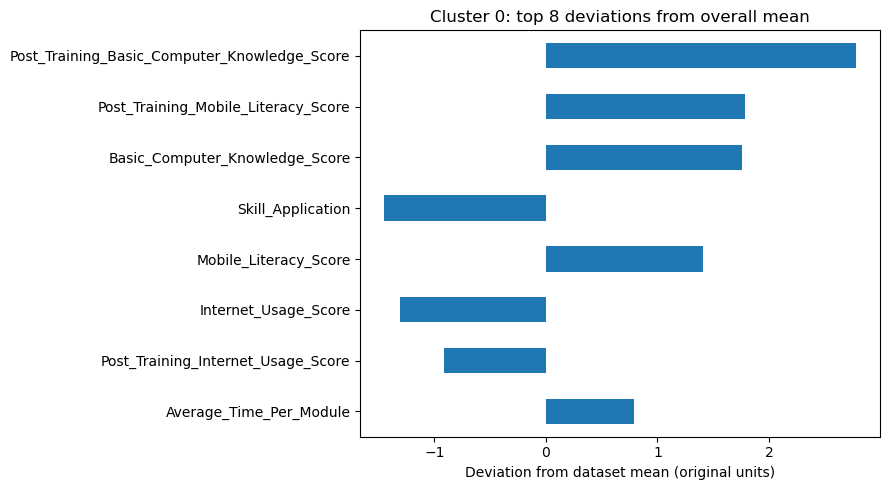

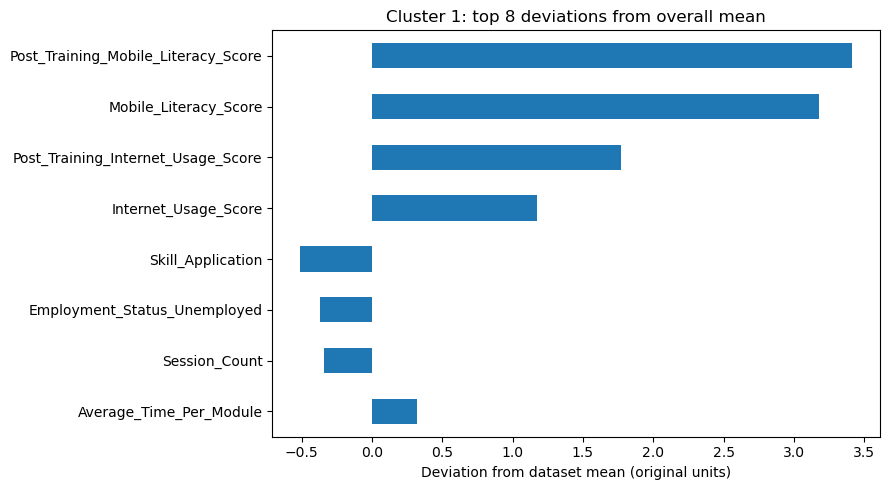

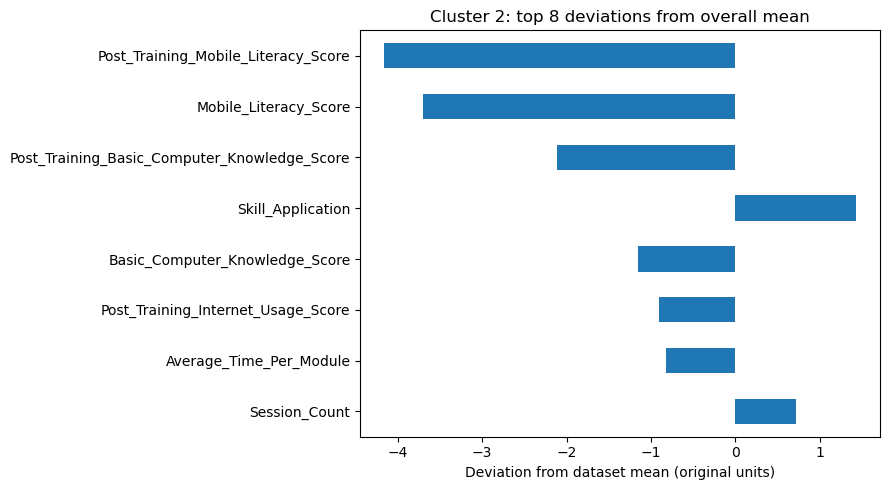

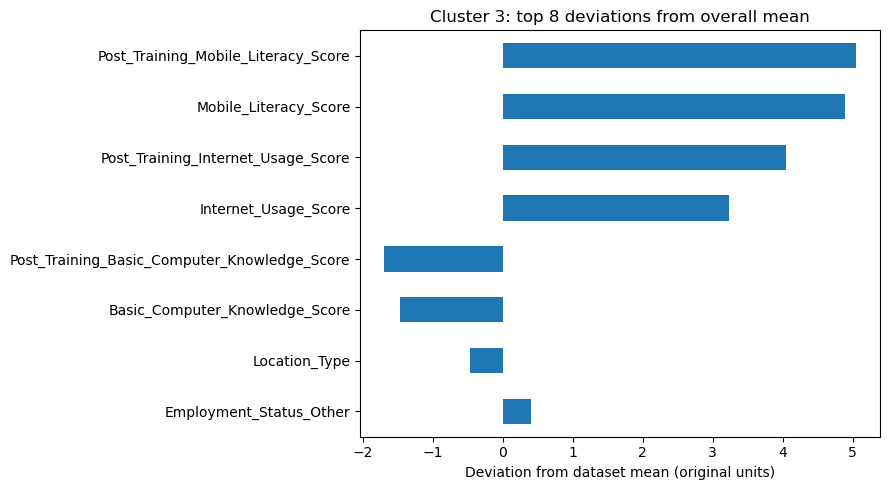

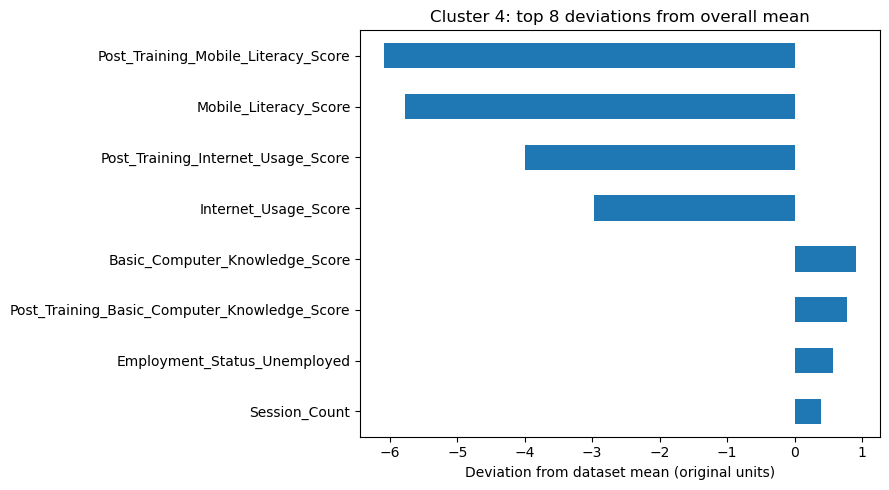

In [184]:
k = 8  # how many top features to show
overall_mean = cluster_profiles.mean(axis=0)
deviation = cluster_profiles - overall_mean   # same units as original features

for i in range(deviation.shape[0]):
    dev_sorted = deviation.iloc[i].sort_values(key=np.abs, ascending=False).head(k)
    plt.figure(figsize=(9, 5))
    dev_sorted.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title(f'Cluster {i}: top {k} deviations from overall mean')
    plt.xlabel('Deviation from dataset mean (original units)')
    plt.tight_layout()
    plt.show()

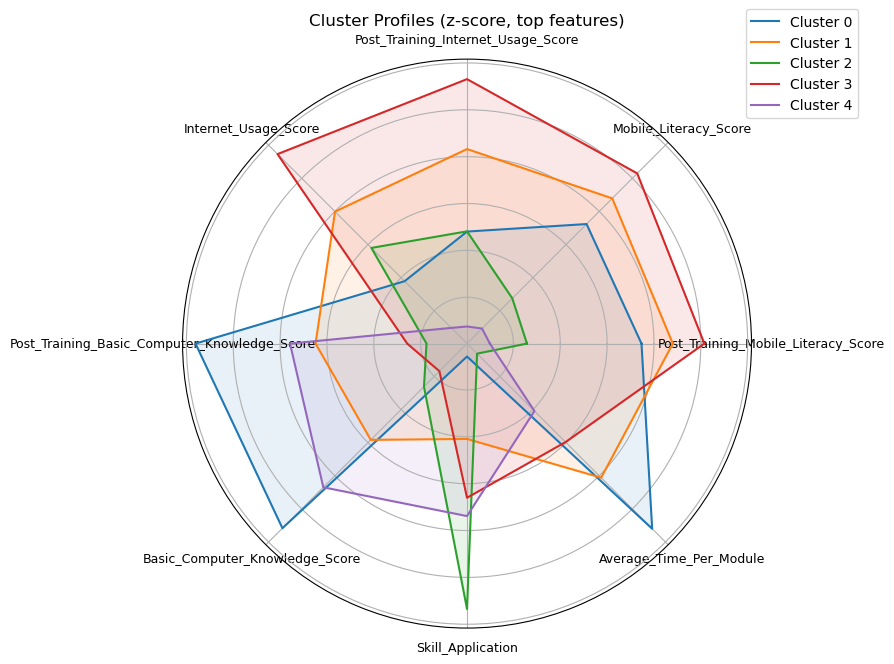

In [186]:
key_features = cluster_profiles.var().sort_values(ascending=False).head(8).index.tolist()
radar_all_clusters(cluster_profiles, key_features,fig=(9,9))

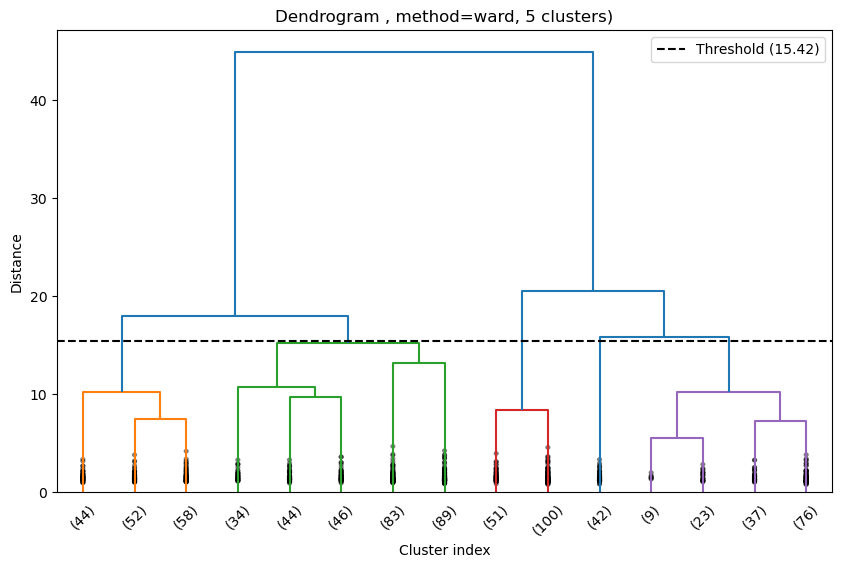

In [191]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(df_scaled, method="ward")

# Determine the threshold that gives 4 clusters
max_d = 0.0
for t in np.linspace(0, np.max(Z[:, 2]), 100):
    if len(np.unique(fcluster(Z, t, criterion='distance'))) == 5:
        max_d = t
        break

# Plot dendrogram with color threshold
plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    truncate_mode="lastp",
    p=15,
    leaf_rotation=45.,
    leaf_font_size=10.,
    show_contracted=True,
    color_threshold=max_d
)
plt.title(f"Dendrogram , method=ward, 5 clusters)")
plt.xlabel("Cluster index")
plt.ylabel("Distance")
plt.axhline(y=max_d, c='k', ls='--', label=f'Threshold ({round(max_d,2)})')
plt.legend()
plt.show()

## Mean Shift Clustering

0.23259604403398657
0.2867316095186434
0.398408562619226
0.47978045836013994
0.5688147952330858
0.6118902972534535
0.6603199165143214
0.6970021983998006
0.7489180355289418
0.8035768048771704


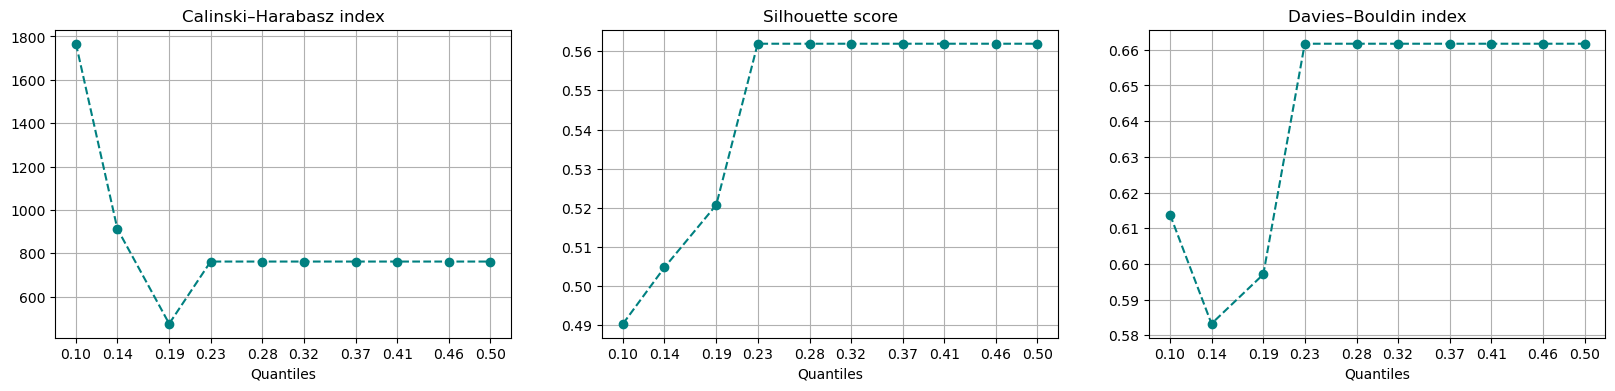

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

cols = ['Cluster']
data = df_scaled.drop(['Cluster'], axis=1) if all(col in df_scaled.columns for col in cols) else df_scaled.copy()

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result = pca.fit_transform(data)

calinski = []
siluette = []
davies = []


quantiles=np.linspace(0.1, 0.5, 10).round(2)

for quantile in quantiles:
    bandwidth = estimate_bandwidth(pca_result, quantile=quantile, n_samples=500)
    ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
    ms_labels = ms.fit_predict(pca_result)
    calinski.append(calinski_harabasz_score(pca_result, ms_labels))
    siluette.append(silhouette_score(pca_result, ms_labels))
    davies.append(davies_bouldin_score(pca_result, ms_labels))


plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.plot(quantiles, calinski, 'o',linestyle='--', color='teal')
plt.title(f"Calinski–Harabasz index") #Higher = better
plt.xticks(quantiles)
plt.xlabel("Quantiles")
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(quantiles, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Silhouette score") #Higher = better
plt.xticks(quantiles)
plt.xlabel("Quantiles")
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(quantiles, davies, 'o',linestyle='--', color='teal')
plt.title(f"Davies–Bouldin index") #Lower = better
plt.xticks(quantiles)
plt.xlabel("Quantiles")
plt.grid()

plt.show()
print()

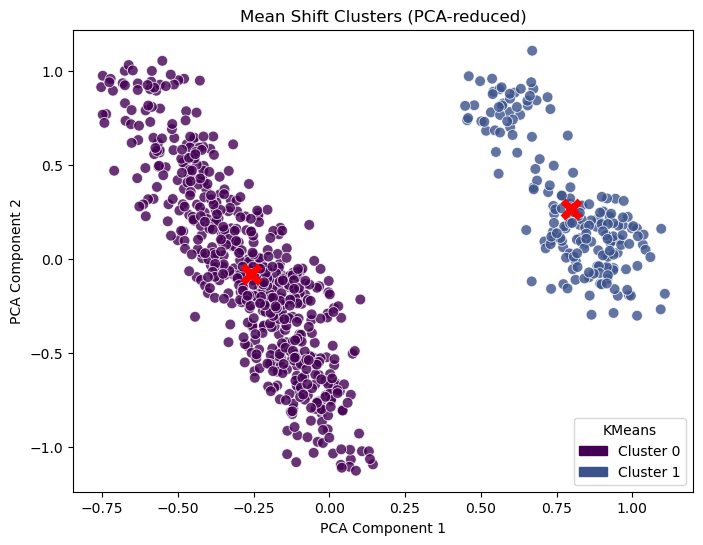

In [227]:
from sklearn.metrics import pairwise_distances_argmin_min

bandwidth = estimate_bandwidth(pca_result, quantile=0.25, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
df_scaled['Cluster']  = ms.fit_predict(pca_result)

unique_clusters = np.unique(df_scaled['Cluster'])
colors = [scatter.cmap(scatter.norm(c)) for c in unique_clusters]

cluster_handles = [
    mpatches.Patch(color=colors[i], label=f"Cluster {cluster}")
    for i, cluster in enumerate(unique_clusters)
]
plt.figure(figsize=(8,6))

seaborn.scatterplot(
        x=pca_result[:,0], y=pca_result[:, 1],
        hue=df_scaled['Cluster'] ,
        palette=colors,
        legend='full',
        alpha=0.8,
        s=60,
    )

medoids = []
for c in unique_clusters:
    cluster_points = pca_result[df_scaled['Cluster'] == c]
    # index of closest point to cluster mean
    mean = cluster_points.mean(axis=0)
    idx, _ = pairwise_distances_argmin_min([mean], cluster_points)
    medoids.append(cluster_points[idx[0]])

medoids = np.array(medoids)

plt.scatter(
    medoids[:, 0], medoids[:, 1],
    c="red", s=150, marker="x",linewidths=5, label="Medoids"
)
plt.legend(handles=cluster_handles, title="KMeans", loc="lower right")
plt.title("Mean Shift Clusters (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [228]:
centers_dbscan=medoids
centers_scaled = pca.inverse_transform(centers_dbscan)
centers_original = minmax_scaler.inverse_transform(centers_scaled)
cluster_profiles = pd.DataFrame(
    centers_original,
    columns=df_encoded.columns  # original features
)
cluster_profiles.round(2)

Age  Gender  ...  Employment_Status_Student  Employment_Status_Unemployed
0  41.37    0.64  ...                       0.23                          0.01
1  40.50    0.56  ...                       0.03                          0.97

[2 rows x 25 columns]

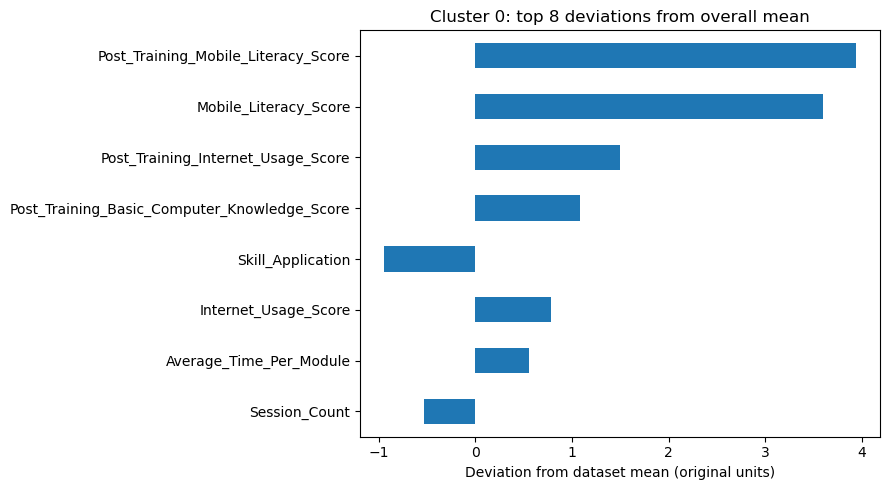

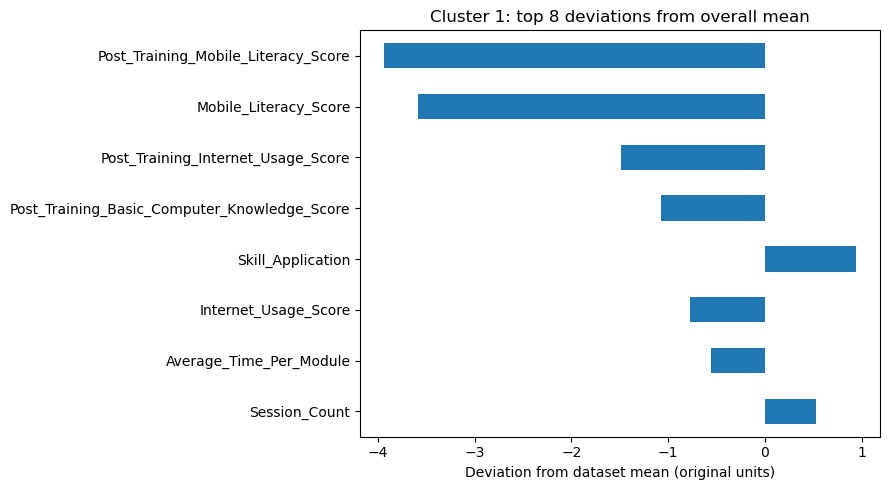

In [229]:
k = 8  # how many top features to show
overall_mean = cluster_profiles.mean(axis=0)
deviation = cluster_profiles - overall_mean   # same units as original features

for i in range(deviation.shape[0]):
    dev_sorted = deviation.iloc[i].sort_values(key=np.abs, ascending=False).head(k)
    plt.figure(figsize=(9, 5))
    dev_sorted.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title(f'Cluster {i}: top {k} deviations from overall mean')
    plt.xlabel('Deviation from dataset mean (original units)')
    plt.tight_layout()
    plt.show()

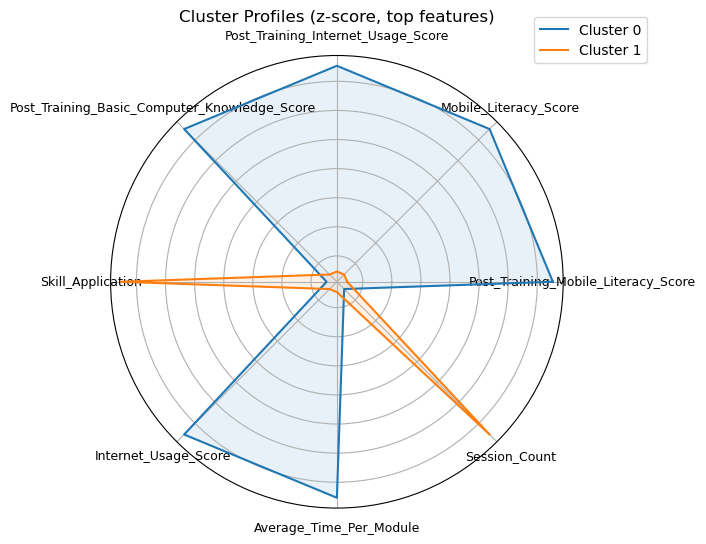

In [230]:
key_features = cluster_profiles.var().sort_values(ascending=False).head(8).index.tolist()
radar_all_clusters(cluster_profiles, key_features,fig=(7,7))

## BIRCH

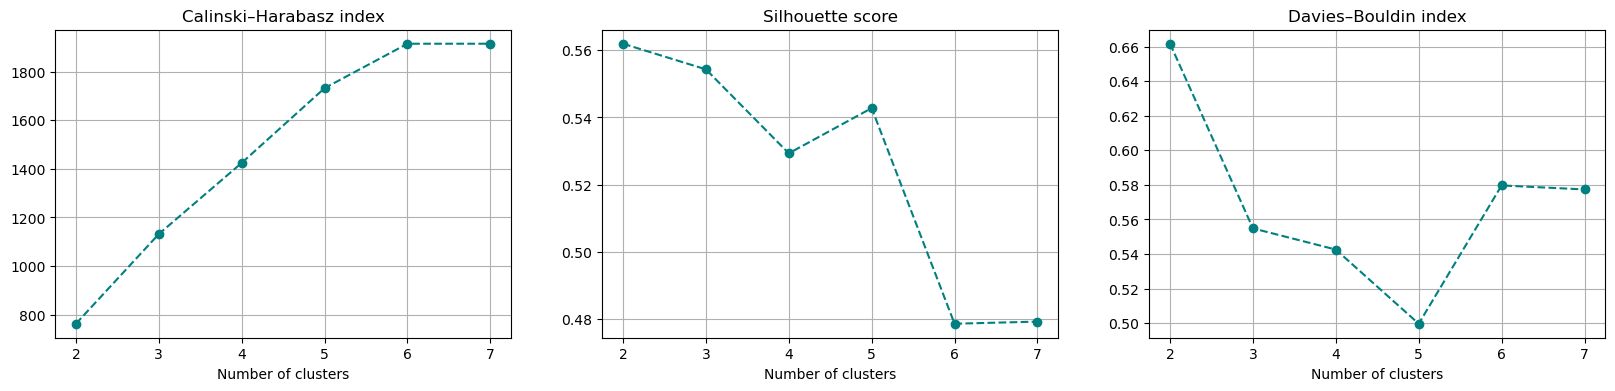

In [233]:
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

cols = ['Cluster']
data = df_scaled.drop(['Cluster'], axis=1) if all(col in df_scaled.columns for col in cols) else df_scaled.copy()

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result = pca.fit_transform(data)

calinski = []
siluette = []
davies = []

num_cluster=np.arange(2,8)

for num in num_cluster:
    bc = Birch(threshold=0.2,n_clusters=num)
    bc_labels = bc.fit_predict(pca_result)
    calinski.append(calinski_harabasz_score(pca_result, bc_labels))
    siluette.append(silhouette_score(pca_result, bc_labels))
    davies.append(davies_bouldin_score(pca_result, bc_labels))

plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.plot(num_cluster, calinski, 'o',linestyle='--', color='teal')
plt.title(f"Calinski–Harabasz index") #Higher = better
plt.xticks(num_cluster)
plt.xlabel("Number of clusters")
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(num_cluster, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Silhouette score") #Higher = better
plt.xticks(num_cluster)
plt.xlabel("Number of clusters")
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(num_cluster, davies, 'o',linestyle='--', color='teal')
plt.title(f"Davies–Bouldin index") #Lower = better
plt.xticks(num_cluster)
plt.xlabel("Number of clusters")
plt.grid()

plt.show()

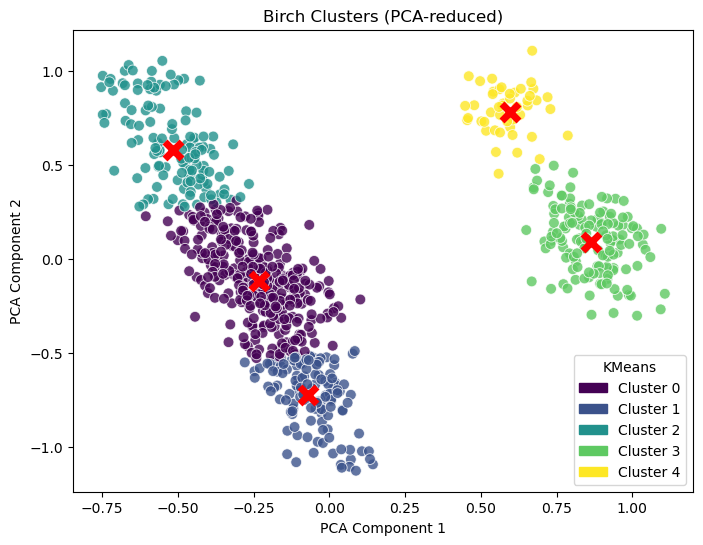

In [237]:
from sklearn.metrics import pairwise_distances_argmin_min

bc = Birch(threshold=0.2,n_clusters=5)
df_scaled['Cluster']  = bc.fit_predict(pca_result)

unique_clusters = np.unique(df_scaled['Cluster'])
colors = [scatter.cmap(scatter.norm(c)) for c in unique_clusters]

cluster_handles = [
    mpatches.Patch(color=colors[i], label=f"Cluster {cluster}")
    for i, cluster in enumerate(unique_clusters)
]
plt.figure(figsize=(8,6))

seaborn.scatterplot(
        x=pca_result[:,0], y=pca_result[:, 1],
        hue=df_scaled['Cluster'] ,
        palette=colors,
        legend='full',
        alpha=0.8,
        s=60,
    )

medoids = []
for c in unique_clusters:
    cluster_points = pca_result[df_scaled['Cluster'] == c]
    # index of closest point to cluster mean
    mean = cluster_points.mean(axis=0)
    idx, _ = pairwise_distances_argmin_min([mean], cluster_points)
    medoids.append(cluster_points[idx[0]])

medoids = np.array(medoids)

plt.scatter(
    medoids[:, 0], medoids[:, 1],
    c="red", s=150, marker="x",linewidths=5, label="Medoids"
)
plt.legend(handles=cluster_handles, title="KMeans", loc="lower right")
plt.title("Birch Clusters (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [240]:
centers_dbscan=medoids
centers_scaled = pca.inverse_transform(centers_dbscan)
centers_original = minmax_scaler.inverse_transform(centers_scaled)
cluster_profiles = pd.DataFrame(
    centers_original,
    columns=df_encoded.columns  # original features
)
cluster_profiles.round(2)

Age  Gender  ...  Employment_Status_Student  Employment_Status_Unemployed
0  41.33    0.63  ...                       0.22                          0.02
1  40.92    0.59  ...                       0.18                         -0.02
2  41.88    0.70  ...                       0.29                         -0.01
3  40.37    0.55  ...                       0.01                          0.98
4  40.91    0.61  ...                       0.08                          0.96

[5 rows x 25 columns]

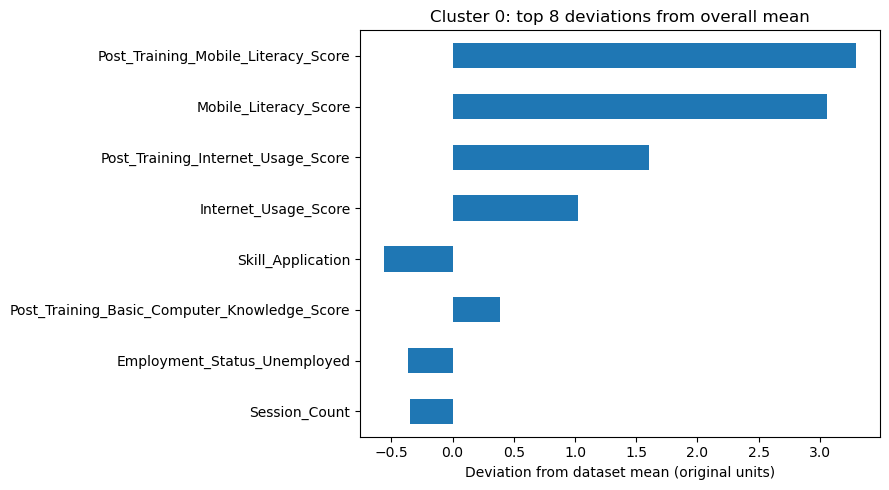

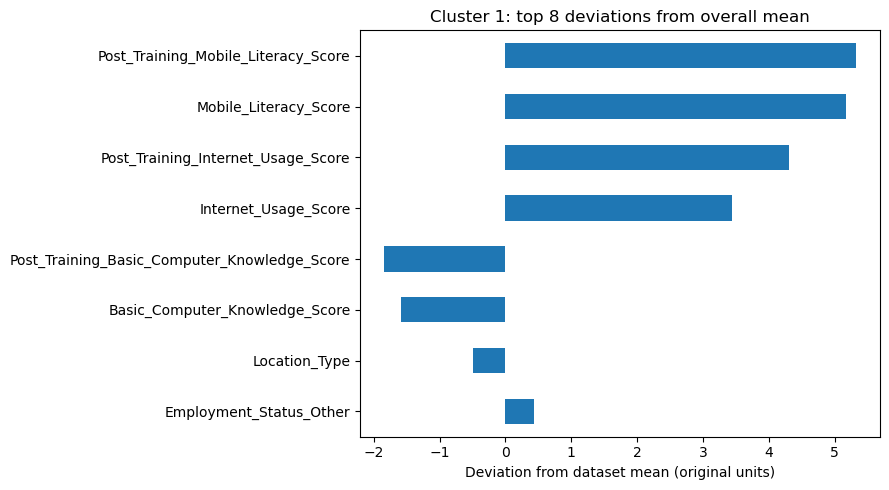

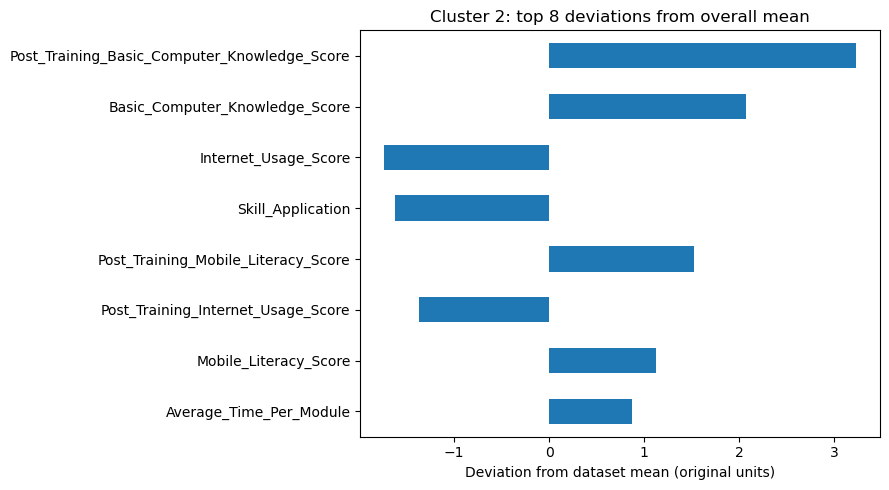

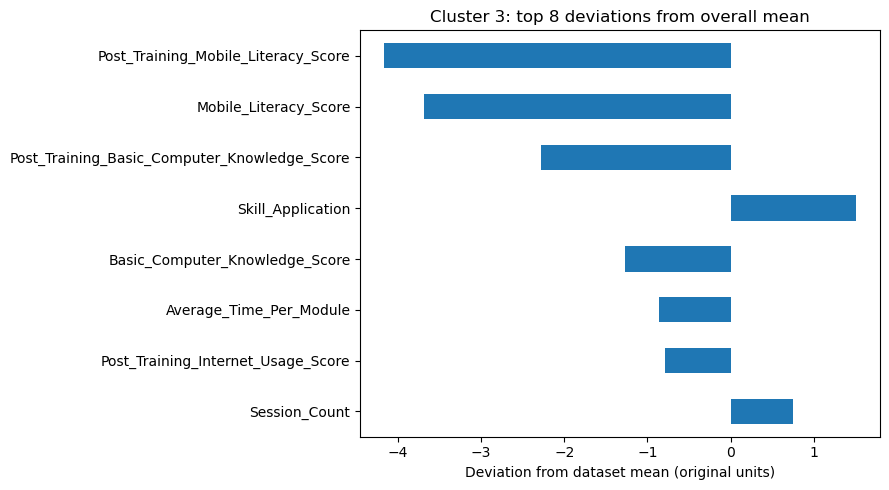

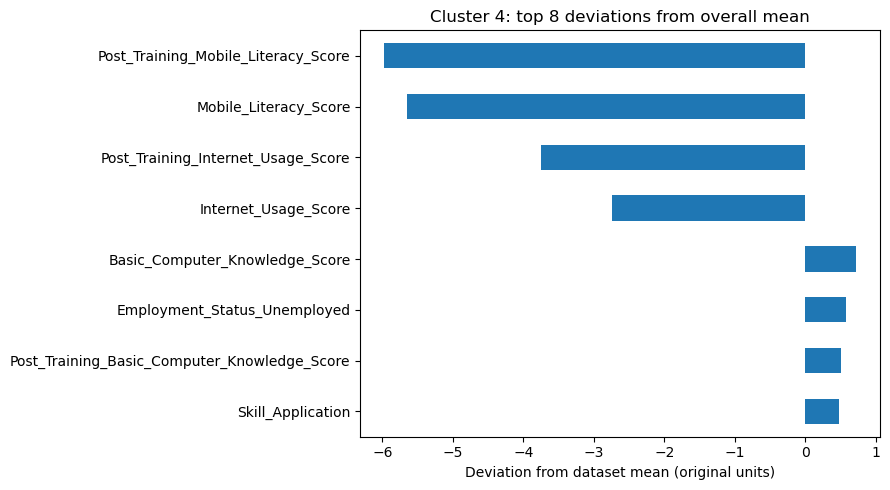

In [241]:
k = 8  # how many top features to show
overall_mean = cluster_profiles.mean(axis=0)
deviation = cluster_profiles - overall_mean   # same units as original features

for i in range(deviation.shape[0]):
    dev_sorted = deviation.iloc[i].sort_values(key=np.abs, ascending=False).head(k)
    plt.figure(figsize=(9, 5))
    dev_sorted.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title(f'Cluster {i}: top {k} deviations from overall mean')
    plt.xlabel('Deviation from dataset mean (original units)')
    plt.tight_layout()
    plt.show()

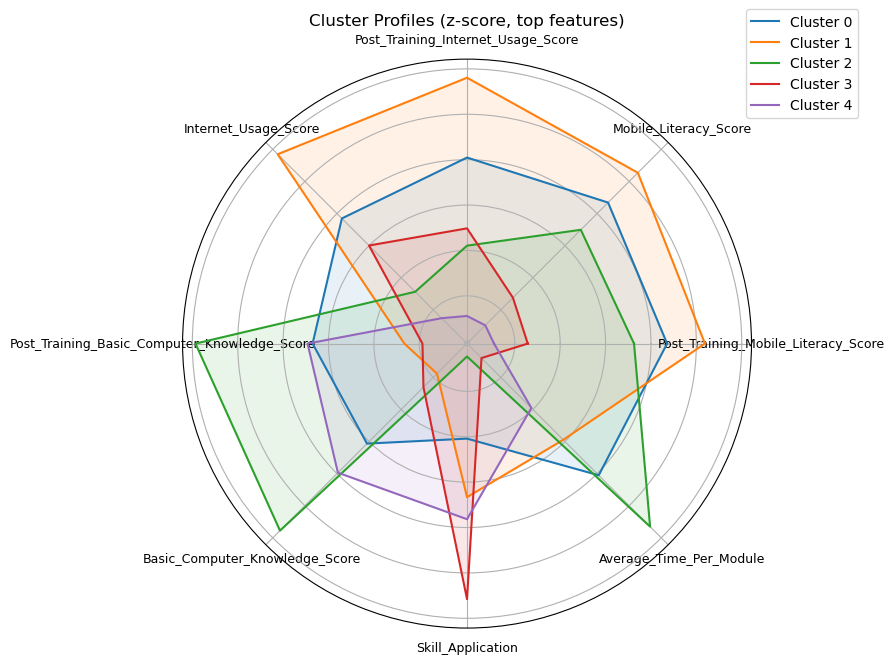

In [242]:
key_features = cluster_profiles.var().sort_values(ascending=False).head(8).index.tolist()
radar_all_clusters(cluster_profiles, key_features,fig=(9,9))